#**Project Name - Retail Sales Prediction**

#**Problem Statement**

######**BUSINESS PROBLEM OVERVIEW**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

##**Know Your Data**

### Import Libraries

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from math import sqrt
import statsmodels.api as sm
from scipy.stats import norm, ttest_1samp
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [2]:
#Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Project/Retail Sales Predictions/Rossmann Stores Data.csv')
store=pd.read_csv('/content/drive/MyDrive/Interview_question_solved/Project/Retail Sales Predictions/store.csv')

### Dataset Rows & Columns count

In [4]:
df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [5]:
store.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

### Merging the two Datasets.

In [6]:
data= pd.merge(df, store, how="left", on="Store")

In [7]:
data.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

### Dataset information

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [9]:
data.shape

(1017209, 18)

### Missing Values/Null Values

In [10]:
data.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [11]:
columns_to_drop = ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
data.drop(columns=columns_to_drop, inplace=True)

In [12]:
data['CompetitionDistance'].value_counts()

CompetitionDistance
250.0      11120
350.0       7536
50.0        7536
1200.0      7374
190.0       7352
           ...  
3920.0       758
4460.0       758
13090.0      758
5890.0       758
12870.0      758
Name: count, Length: 654, dtype: int64

In [13]:
median_distance = data['CompetitionDistance'].median()
data['CompetitionDistance'].fillna(median_distance, inplace=True)

In [14]:
data.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [15]:
duplicates =len(data[data.duplicated()])
print(duplicates)

0


### Descriptive Statistics

In [16]:
#Dataset Columns
print(df.columns.tolist())
print(store.columns.tolist())

['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']
['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']


In [17]:
#Dataset Descirbe
data.describe(include='all').T

count unique         top    freq         mean  \
Store                1017209.0    NaN         NaN     NaN   558.429727   
DayOfWeek            1017209.0    NaN         NaN     NaN     3.998341   
Date                   1017209    942  2015-07-31    1115          NaN   
Sales                1017209.0    NaN         NaN     NaN  5773.818972   
Customers            1017209.0    NaN         NaN     NaN   633.145946   
Open                 1017209.0    NaN         NaN     NaN     0.830107   
Promo                1017209.0    NaN         NaN     NaN     0.381515   
StateHoliday           1017209      5           0  855087          NaN   
SchoolHoliday        1017209.0    NaN         NaN     NaN     0.178647   
StoreType              1017209      4           a  551627          NaN   
Assortment             1017209      3           a  537445          NaN   
CompetitionDistance  1017209.0    NaN         NaN     NaN   5422.03379   
Promo2               1017209.0    NaN         NaN     NaN     0.500564   

                             std   min     25%     50%     75%      max  
Store                 321.908651   1.0   280.0   558.0   838.0   1115.0  
DayOfWeek               1.997391   1.0     2.0     4.0     6.0      7.0  
Date                         NaN   NaN     NaN     NaN     NaN      NaN  
Sales                3849.926175   0.0  3727.0  5744.0  7856.0  41551.0  
Customers             464.411734   0.0   405.0   609.0   837.0   7388.0  
Open                    0.375539   0.0     1.0     1.0     1.0      1.0  
Promo                   0.485759   0.0     0.0     0.0     1.0      1.0  
StateHoliday                 NaN   NaN     NaN     NaN     NaN      NaN  
SchoolHoliday           0.383056   0.0     0.0     0.0     0.0      1.0  
StoreType                    NaN   NaN     NaN     NaN     NaN      NaN  
Assortment                   NaN   NaN     NaN     NaN     NaN      NaN  
CompetitionDistance  7706.913044  20.0   710.0  2330.0  6880.0  75860.0  
Promo2                       0.5   0.0     0.0     1.0     1.0      1.0

### Check Unique Values for each variable.

In [18]:
#Check unique values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")
print("--"*80)
for i in store.columns.tolist():
  print("No. of unique values in ",i,"is",store[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .
----------------------------------------------------------------------------------------------------------------------------------------------------------------
No. of unique values in  Store is 1115 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 654 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 24 .
No. of unique values in  Promo2SinceYear is 7 .
No. of unique values in  PromoI

###Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of cleaning, structuring, and organizing raw, unprocessed data into a usable and understandable format. This is a crucial step in the data preparation phase before analysis and modeling.

###Duplicate Values

In [19]:
print(len(df[df.duplicated()]))
print(len(store[store.duplicated()]))

0
0


###Date Column

In [21]:
data['Date'] = pd.to_datetime(data['Date'])
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['year'] = data['Date'].dt.year
data['week_of_year'] = data['Date'].dt.isocalendar().week

In [22]:
print(f" start_date is from {data['year'].min()} - end_date is to {data['year'].max()}")

 start_date is from 2013 - end_date is to 2015


In [23]:
#Create a new column 'TotalSales' as the product of 'Sales' and 'Customers'
data['TotalSales'] = data['Sales'] * data['Customers']

In [24]:
#Calculate the average sales per customer and create a new column 'AvgSalesPerCustomer'
data['AvgSalesPerCustomer'] = data['Sales'] / data['Customers']

In [25]:
print(f"Maximunm sales is {data.Sales.max()} and Minimum Sales is {data.Sales.min()}")

Maximunm sales is 41551 and Minimum Sales is 0


In [26]:
#Create a pivot table to summarize average sales by 'DayOfWeek' and 'Promo'
sales_pivot = pd.pivot_table(df, values='Sales', index='DayOfWeek', columns='Promo', aggfunc='mean')
print("Pivot table of average sales by DayOfWeek and Promo:")
sales_pivot

Pivot table of average sales by DayOfWeek and Promo:


Promo                0            1
DayOfWeek                          
1          5604.357608  9707.808423
2          5612.048396  8227.909603
3          5418.548638  7554.021384
4          5097.574306  7259.497280
5          6178.610459  7202.540577
6          5847.562599          NaN
7           204.183189          NaN

### Total sales per month

In [27]:
#Group data by 'Month' and calculate the total sales for each month
monthly_sales = data.groupby('month')['Sales'].sum()
print("Total sales per month:")
monthly_sales

Total sales per month:


month
1     566728724
2     528734410
3     599831906
4     575895295
5     569248217
6     578112775
7     595059205
8     361791202
9     342570131
10    351878728
11    369498877
12    433831153
Name: Sales, dtype: int64

### Avg_sales_school_holiday

In [28]:
#Determine the average sales on days with and without a school holiday
avg_sales_school_holiday = data.groupby('SchoolHoliday')['Sales'].mean()
print("Average sales on days with and without a school holiday:")
avg_sales_school_holiday

Average sales on days with and without a school holiday:


SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64

In [29]:
#Count the occurrences of each unique value in the 'StateHoliday' column
state_holiday_counts = data['StateHoliday'].value_counts()
print("StateHoliday value counts:")
state_holiday_counts

StateHoliday value counts:


StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

In [30]:
#Calculate the percentage of open stores on different days of the week
open_percentage_by_day = data.groupby('DayOfWeek')['Open'].mean() * 100
print("Percentage of open stores by day of the week:")
open_percentage_by_day

Percentage of open stores by day of the week:


DayOfWeek
1    95.045948
2    98.830871
3    97.440016
4    92.319929
5    95.059824
6    99.535687
7     2.482554
Name: Open, dtype: float64

### Total_sales_per_store

In [31]:
#Calculate the total sales for each store and sort them in descending order
total_sales_per_store = data.groupby('Store')['Sales'].sum().sort_values(ascending=False)
print("Total sales for each store (descending order):")
total_sales_per_store[:10]

Total sales for each store (descending order):


Store
262     19516842
817     17057867
562     16927322
1114    16202585
251     14896870
513     14252406
788     14082141
733     14067158
383     13489879
756     12911782
Name: Sales, dtype: int64

### SalesCategory

In [32]:
#Create a new column 'SalesCategory' based on sales ranges (e.g., low, medium, high)
sales_bins = [0, 5000, 10000, float('inf')]
sales_labels = ['Low', 'Medium', 'High']
data['SalesCategory'] = pd.cut(df['Sales'], bins=sales_bins, labels=sales_labels)
print("Sales categories:")
print(data[['Sales', 'SalesCategory']].head())

Sales categories:
   Sales SalesCategory
0   5263        Medium
1   6064        Medium
2   8314        Medium
3  13995          High
4   4822           Low


### Avg_sales_promo

In [33]:
#Compare the average sales on promotional days vs. non-promotional days
avg_sales_promo = data.groupby('Promo')['Sales'].mean()
print("Average sales on promotional vs. non-promotional days:")
avg_sales_promo

Average sales on promotional vs. non-promotional days:


Promo
0    4406.050805
1    7991.152046
Name: Sales, dtype: float64

### Avg_sales_by_day

In [34]:
#Calculate the average sales on different days of the week
avg_sales_by_day = data.groupby('DayOfWeek')['Sales'].mean()
print("Average sales on each day of the week:")
avg_sales_by_day

Average sales on each day of the week:


DayOfWeek
1    7809.044510
2    7005.244467
3    6555.884138
4    6247.575913
5    6723.274305
6    5847.562599
7     204.183189
Name: Sales, dtype: float64

### correlation between 'Sales' and 'Customers'

In [35]:
#Examine the correlation between 'Sales' and 'Customers'
sales_customers_corr = data['Sales'].corr(data['Customers'])
print("Correlation between Sales and Customers:", sales_customers_corr)

Correlation between Sales and Customers: 0.8947107733017032


### Avg_sales_school_holiday

In [36]:
#Investigate the relationship between 'Sales' and 'SchoolHoliday'
avg_sales_school_holiday = data.groupby('SchoolHoliday')['Sales'].mean()
print("Average sales on days with and without a school holiday:")
avg_sales_school_holiday

Average sales on days with and without a school holiday:


SchoolHoliday
0    5620.979034
1    6476.522207
Name: Sales, dtype: float64

In [37]:
# Create new columns for each category using one-hot encoding
data['SalesCategory_Medium'] = np.where(data['SalesCategory'] == 'Medium', 1, 0)
data['SalesCategory_Low'] = np.where(data['SalesCategory'] == 'Low', 1, 0)
data['SalesCategory_High'] = np.where(data['SalesCategory'] == 'High', 1, 0)

In [38]:
# Create a pivot table
pivot_table = pd.pivot_table(data,
                             values=['SalesCategory_Medium', 'SalesCategory_Low', 'SalesCategory_High'],
                             index=['SalesCategory'],
                             aggfunc=np.sum,
                             fill_value=0)

# Display the pivot table
print(pivot_table)

               SalesCategory_High  SalesCategory_Low  SalesCategory_Medium
SalesCategory                                                             
Low                             0             230240                     0
Medium                          0                  0                500465
High                       113633                  0                     0


#**EDA**

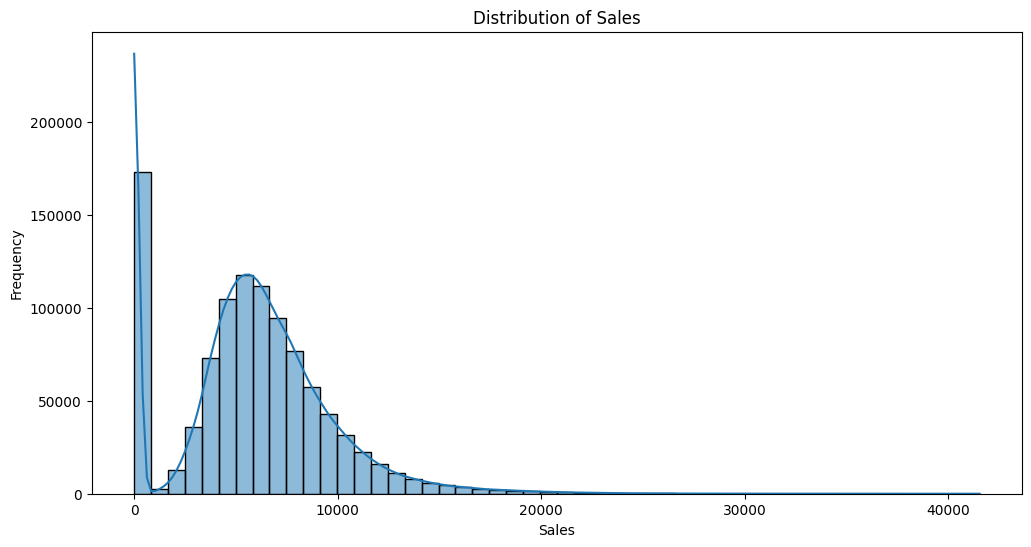

In [39]:
# Plot 1: Sales distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

##### Output sales is positively skewed

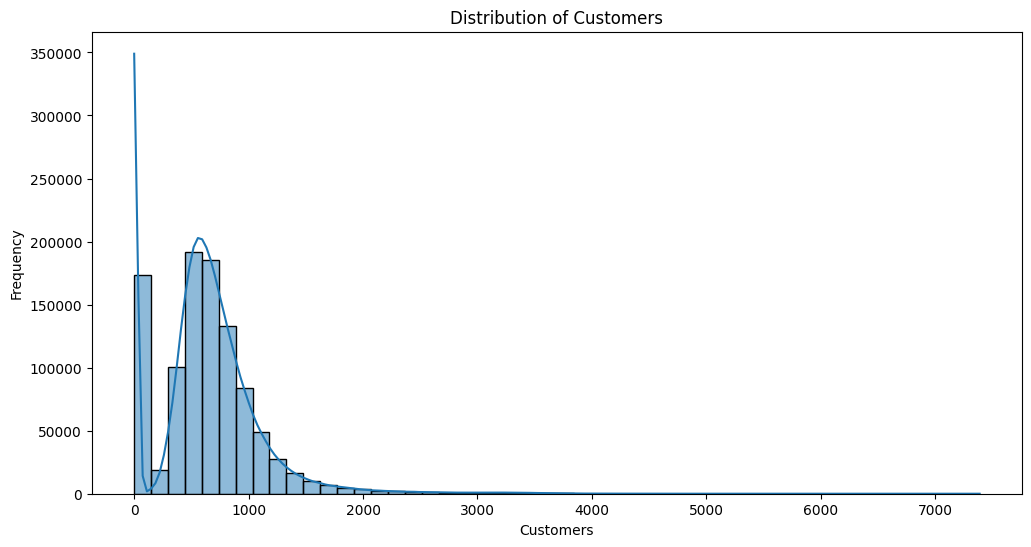

In [40]:
# Plot 2: Customers distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['Customers'], bins=50, kde=True)
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.show()

#### Overall Customer Distribution: The plot suggests the presence of a possible unimodal distribution, with a single peak at a certain customer count. This indicates that there might be a central tendency around a specific number of customers.

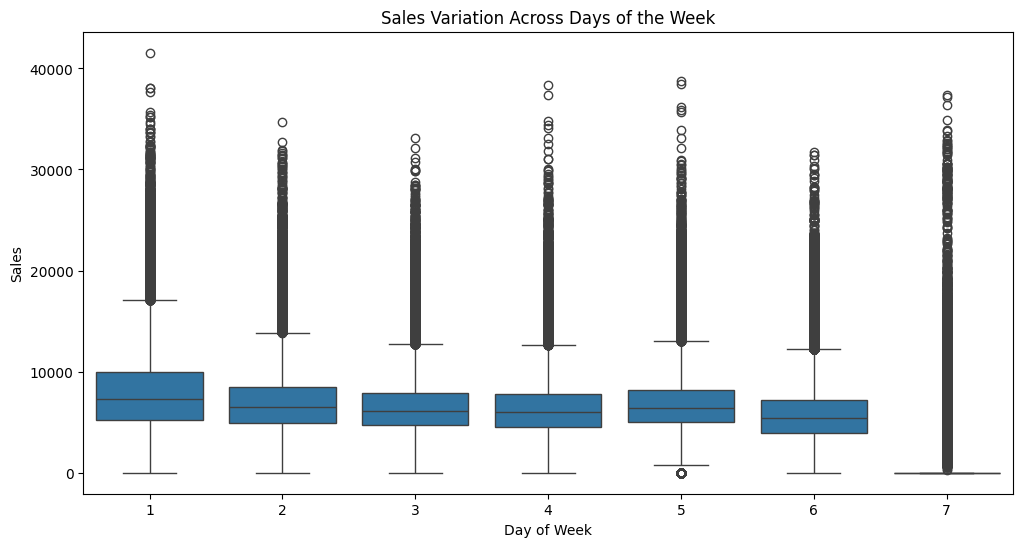

In [41]:
# Plot 3: Sales vs. DayOfWeek
plt.figure(figsize=(12, 6))
sns.boxplot(x='DayOfWeek', y='Sales', data=data)
plt.title('Sales Variation Across Days of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

#### First day sales are high compare to others

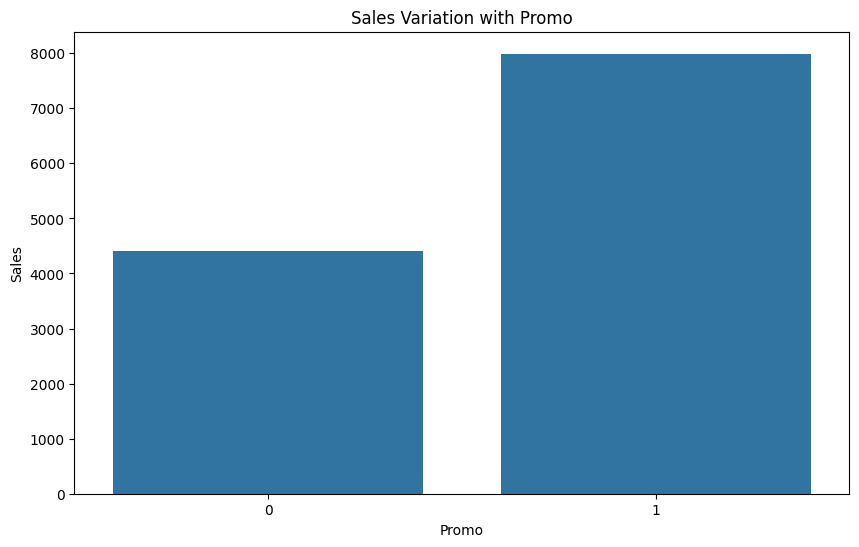

In [42]:
# Plot 4 (Alternative): Sales vs. Promo - Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Promo', y='Sales', data=data, ci=None)
plt.title('Sales Variation with Promo')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

#### When there is no promotion (promo = 0), the average sales value is around 4500. When there is a promotion (promo = 1), the average sales value is around 8000.

* This suggests that promotions have a substantial positive effect on sales. Businesses can interpret this by understanding that running promotional activities, such as discounts, special offers, or advertising campaigns, can lead to a significant increase in sales compared to periods without promotions.

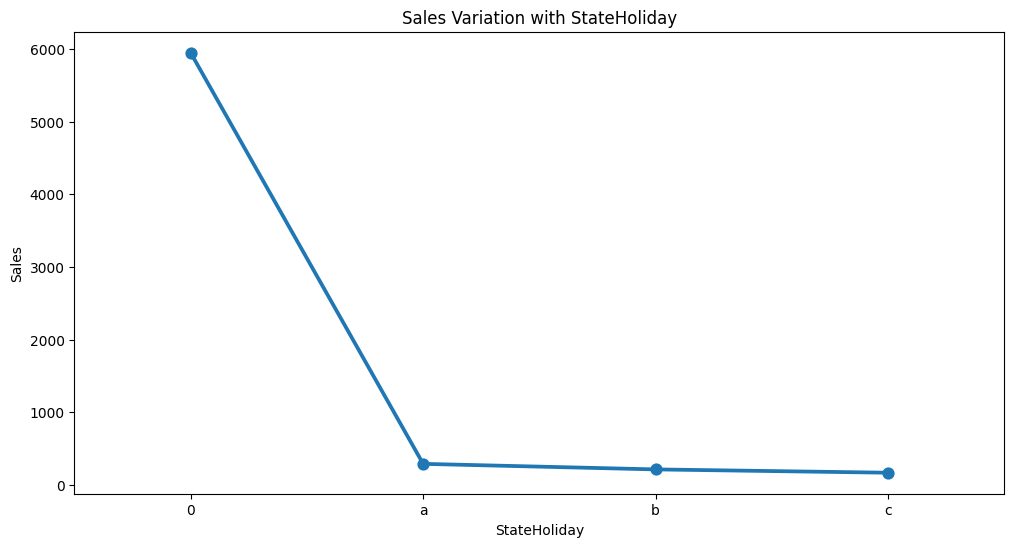

In [43]:
# Plot 5 (Alternative): Sales vs. StateHoliday - Point Plot
plt.figure(figsize=(12, 6))
sns.pointplot(x='StateHoliday', y='Sales', data=data, ci=None)
plt.title('Sales Variation with StateHoliday')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

#### In the point plot comparing sales with different state holidays, it appears that state holidays coded as '0' have the highest average sales compared to other categories.

* This suggests that there might be a difference in consumer behavior during regular days (coded as '0') compared to state holidays labeled as 'a', 'b', and 'c'. It could be inferred that during regular days, customers tend to spend more, resulting in higher sales.

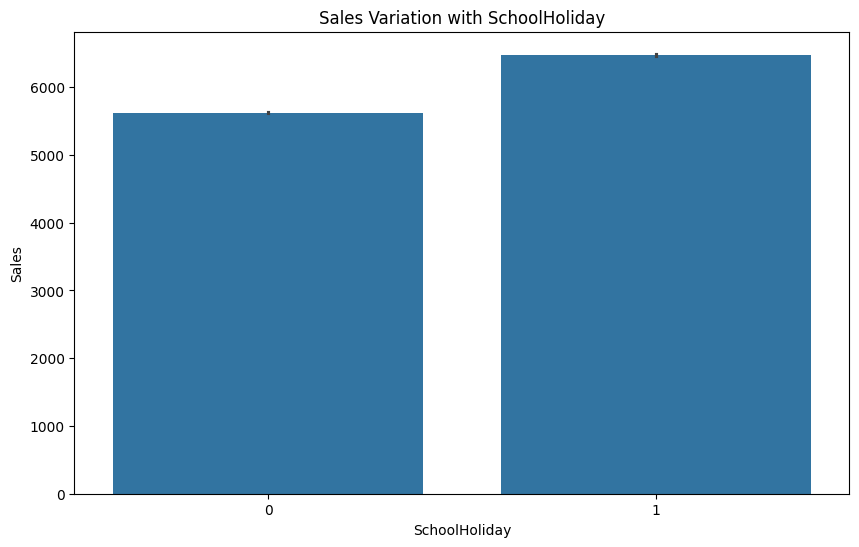

In [44]:
# Plot 6: Sales vs. SchoolHoliday
plt.figure(figsize=(10, 6))
sns.barplot(x='SchoolHoliday', y='Sales', data=data)
plt.title('Sales Variation with SchoolHoliday')
plt.xlabel('SchoolHoliday')
plt.ylabel('Sales')
plt.show()

 #### It appears that during school holidays (coded as '1'), the average sales are higher compared to regular days (coded as '0').


*   This suggests that there might be a difference in consumer behavior during school holidays compared to regular days. One possible explanation could be that during school holidays, families have more free time, which may lead to increased shopping activities. Additionally, parents may take advantage of school holidays to spend more time with their children and engage in leisure activities, including shopping.

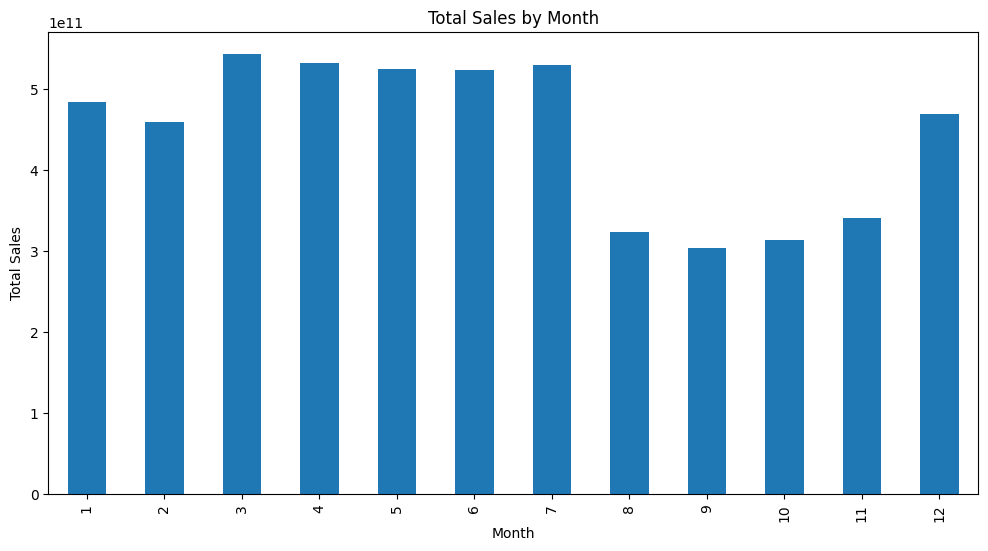

In [45]:
# Plot 7: Total Sales by Month
plt.figure(figsize=(12, 6))
monthly_sales_plot = data.groupby('month')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

#### Month between 3 to 7 has high totalsales

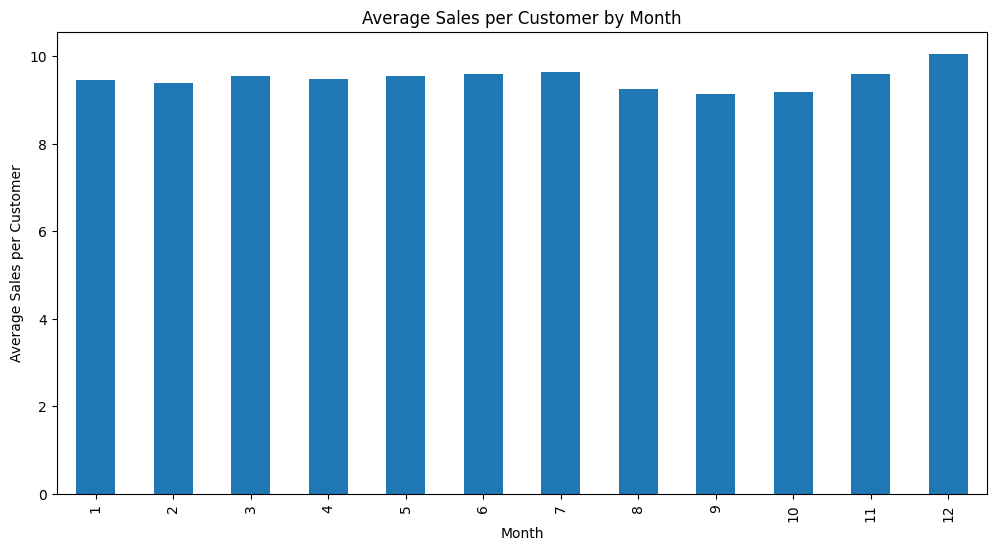

In [46]:
# Plot 8: Average Sales per Customer by Month
plt.figure(figsize=(12, 6))
avg_sales_per_customer_plot = data.groupby('month')['AvgSalesPerCustomer'].mean().plot(kind='bar')
plt.title('Average Sales per Customer by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales per Customer')
plt.show()

#### Average sales are high in the month of 12

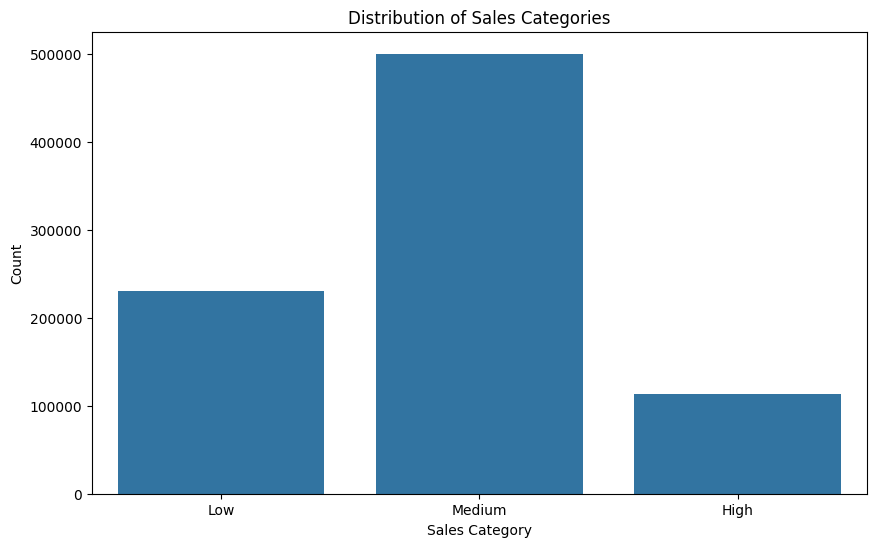

In [47]:
# Plot 9: Sales Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='SalesCategory', data=data, order=['Low', 'Medium', 'High'])
plt.title('Distribution of Sales Categories')
plt.xlabel('Sales Category')
plt.ylabel('Count')
plt.show()

#### Medium sales category are high

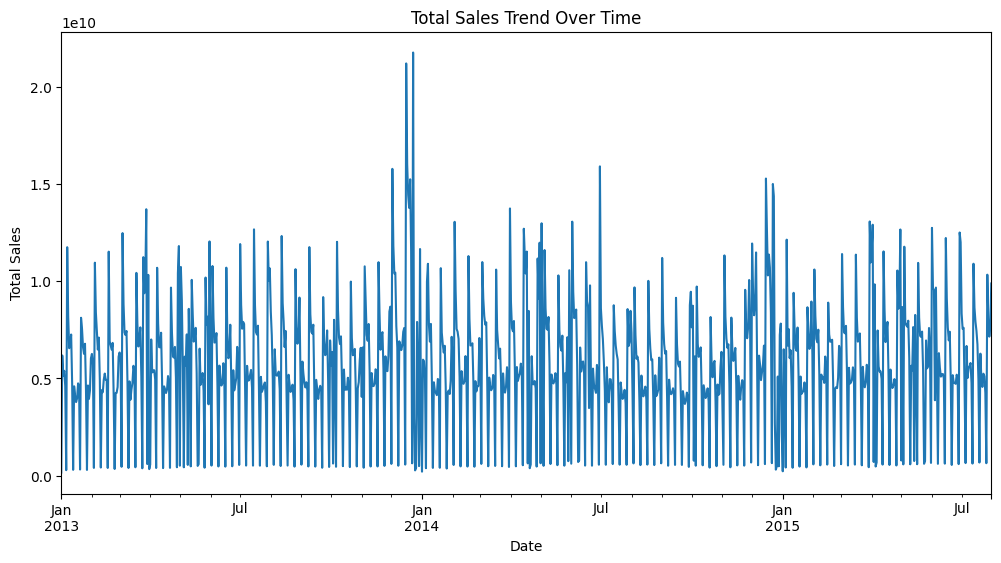

In [48]:
# Plot 10: Total Sales Trend Over Time
plt.figure(figsize=(12, 6))
data.groupby('Date')['TotalSales'].sum().plot()
plt.title('Total Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

#### Total sales trend are high in Jan 2014 month

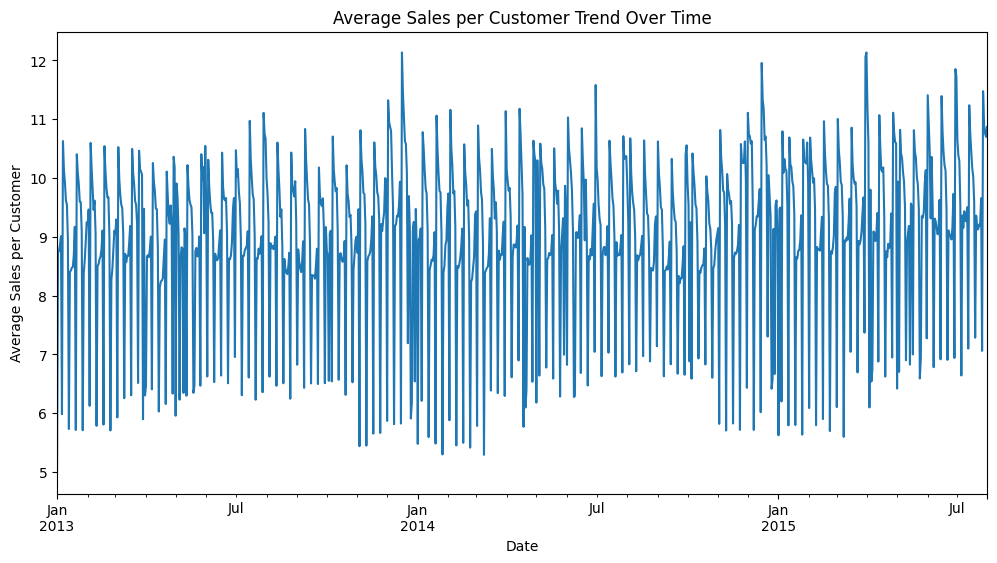

In [49]:
# Plot 13: Average Sales per Customer Trend Over Time
plt.figure(figsize=(12, 6))
data.groupby('Date')['AvgSalesPerCustomer'].mean().plot()
plt.title('Average Sales per Customer Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Sales per Customer')
plt.show()

#### Average sales are high in Jan 2014 to Jan 2015

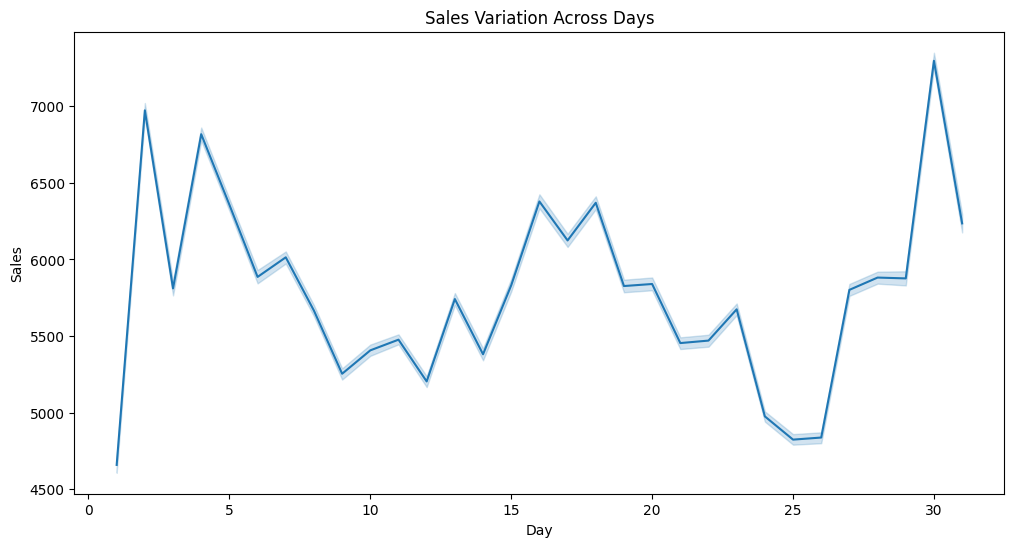

In [50]:
# Plot 13: Sales vs. Day
plt.figure(figsize=(12, 6))
sns.lineplot(x='day', y='Sales', data=data)
plt.title('Sales Variation Across Days')
plt.xlabel('Day')
plt.ylabel('Sales')
plt.show()

#### 30th day are high sales

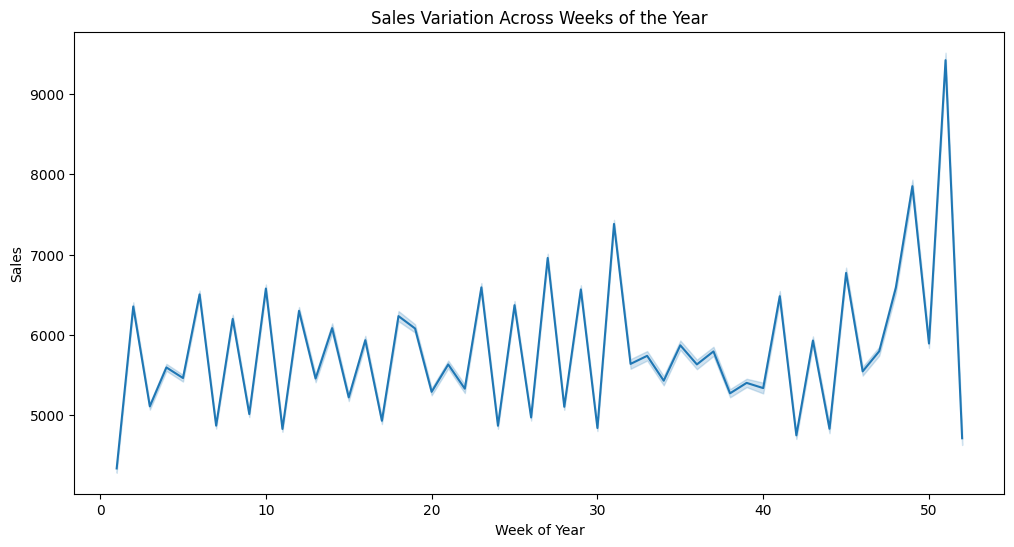

In [51]:
# Plot 14: Sales vs. Week of Year
plt.figure(figsize=(12, 6))
sns.lineplot(x='week_of_year', y='Sales', data=data)
plt.title('Sales Variation Across Weeks of the Year')
plt.xlabel('Week of Year')
plt.ylabel('Sales')
plt.show()

#### 50th week has high sales

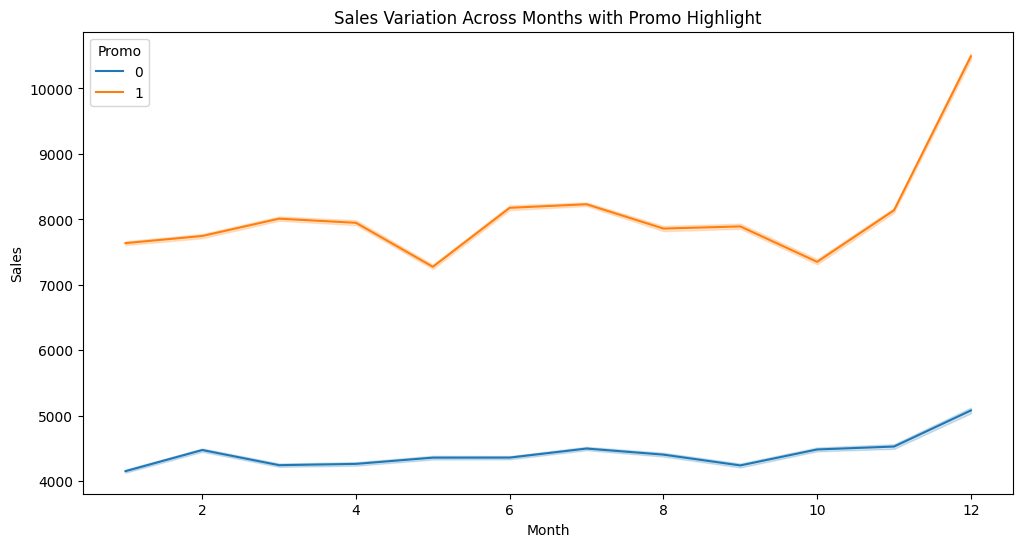

In [52]:
# Plot 15: Sales vs. Month with Promo Highlight
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='Sales', hue='Promo', data=data)
plt.title('Sales Variation Across Months with Promo Highlight')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

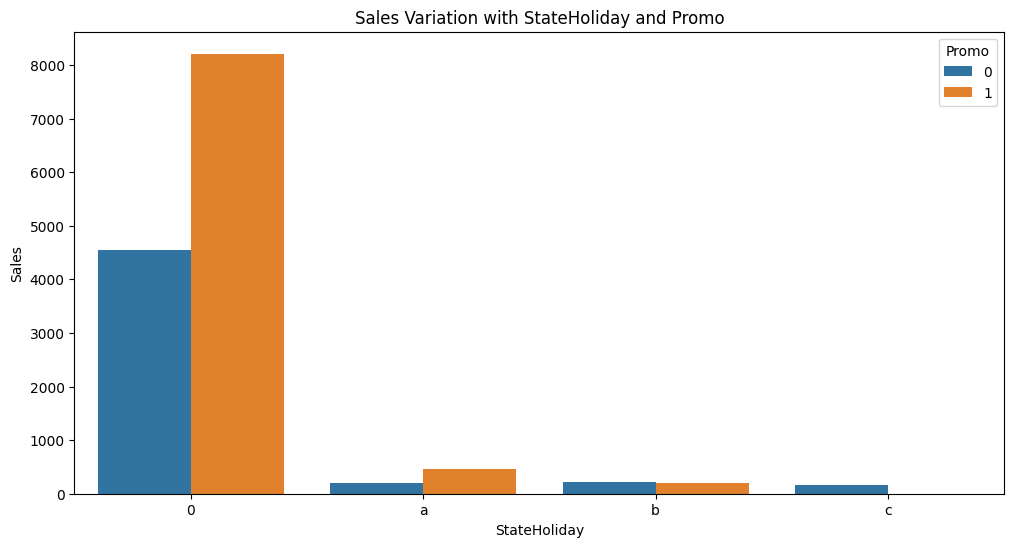

In [53]:
# Plot 16 (Alternative): Barplot of Sales by StateHoliday and Promo
plt.figure(figsize=(12, 6))
sns.barplot(x='StateHoliday', y='Sales', hue='Promo', data=data, ci=None)
plt.title('Sales Variation with StateHoliday and Promo')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

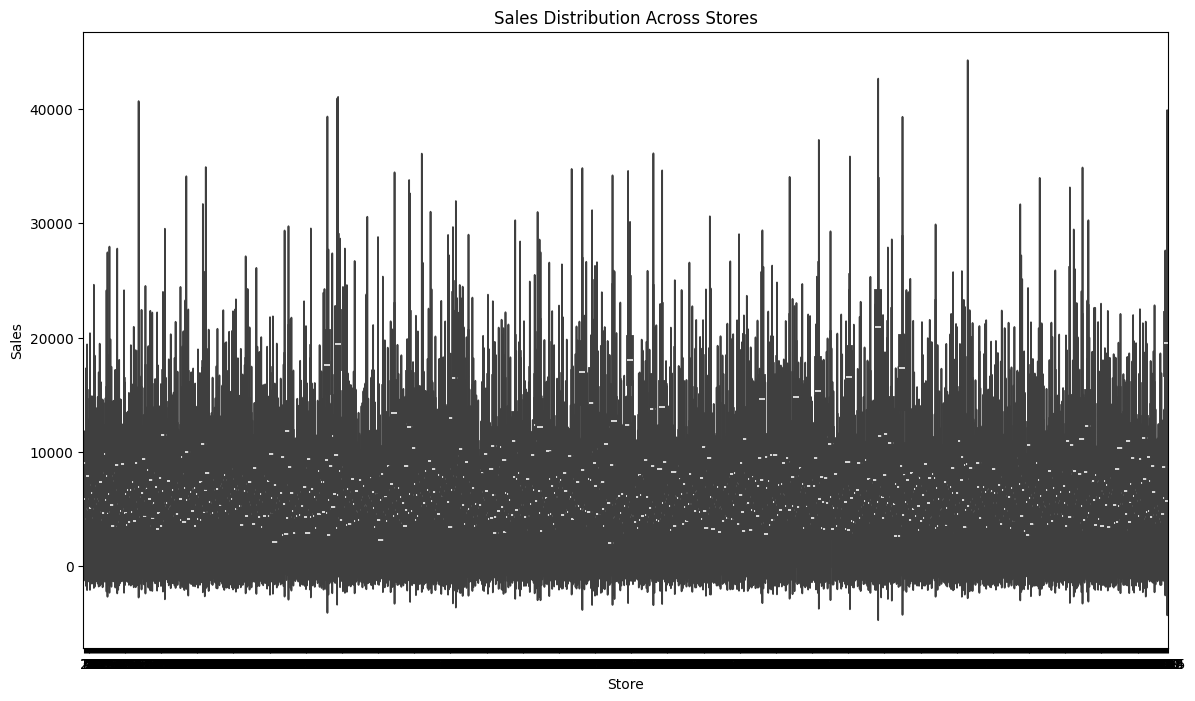

In [54]:
# Plot 17: Violinplot of Sales Distribution Across Stores
plt.figure(figsize=(14, 8))
sns.violinplot(x='Store', y='Sales', data=data)
plt.title('Sales Distribution Across Stores')
plt.xlabel('Store')
plt.ylabel('Sales')
plt.show()

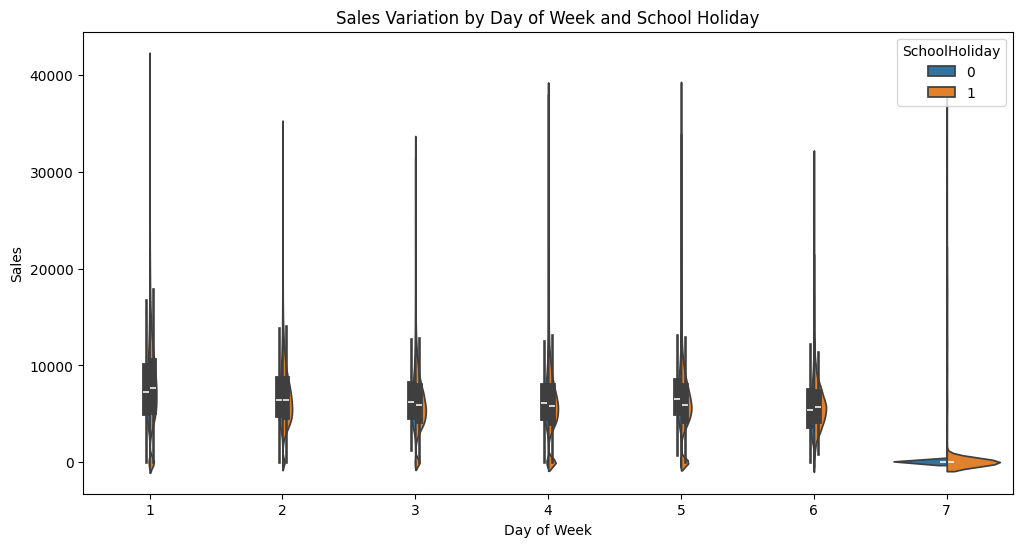

In [55]:
# Plot 18: (Alternative): Violin Plot of Sales by Day of Week and School Holiday
plt.figure(figsize=(12, 6))
sns.violinplot(x='DayOfWeek', y='Sales', hue='SchoolHoliday', data=data, split=True)
plt.title('Sales Variation by Day of Week and School Holiday')
plt.xlabel('Day of Week')
plt.ylabel('Sales')
plt.show()

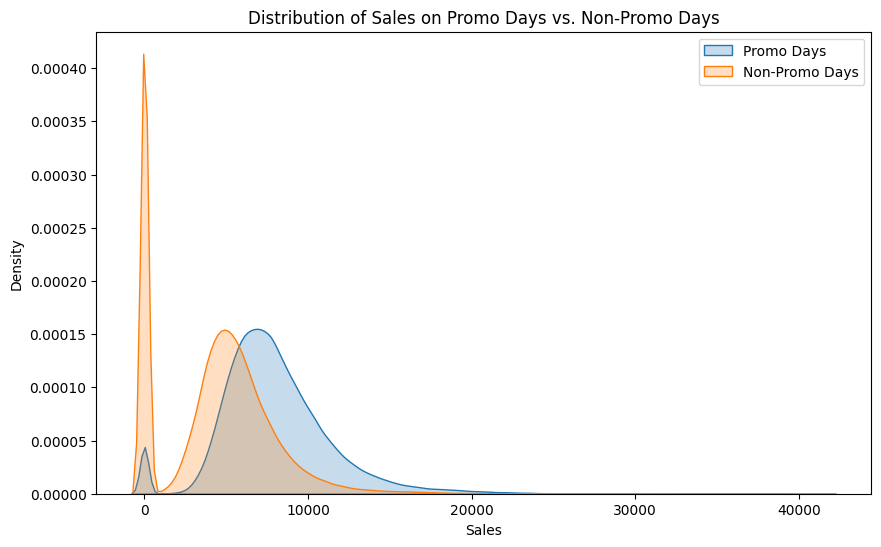

In [56]:
# Plot 19: Distribution of Sales on Promo Days vs. Non-Promo Days
plt.figure(figsize=(10, 6))
sns.kdeplot(data.loc[data['Promo'] == 1, 'Sales'], label='Promo Days', shade=True)
sns.kdeplot(data.loc[data['Promo'] == 0, 'Sales'], label='Non-Promo Days', shade=True)
plt.title('Distribution of Sales on Promo Days vs. Non-Promo Days')
plt.xlabel('Sales')
plt.ylabel('Density')
plt.legend()
plt.show()

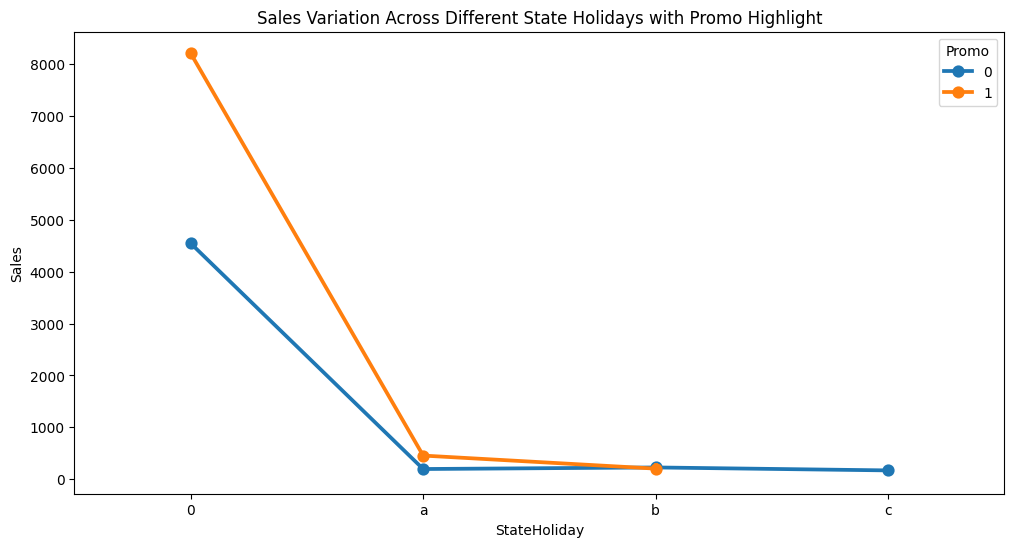

In [57]:
# Plot 20: Sales Variation Across Different State Holidays
plt.figure(figsize=(12, 6))
sns.pointplot(x='StateHoliday', y='Sales', hue='Promo', data=data)
plt.title('Sales Variation Across Different State Holidays with Promo Highlight')
plt.xlabel('StateHoliday')
plt.ylabel('Sales')
plt.show()

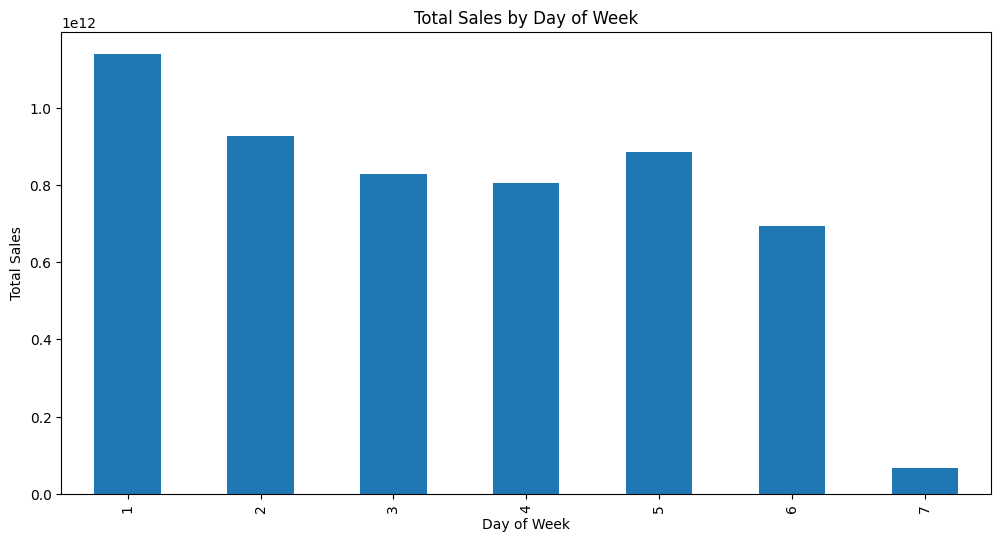

In [58]:
# Plot 21: Total Sales by Day of Week
plt.figure(figsize=(12, 6))
data.groupby('DayOfWeek')['TotalSales'].sum().plot(kind='bar')
plt.title('Total Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.show()

#### 1st Week of day has high sales

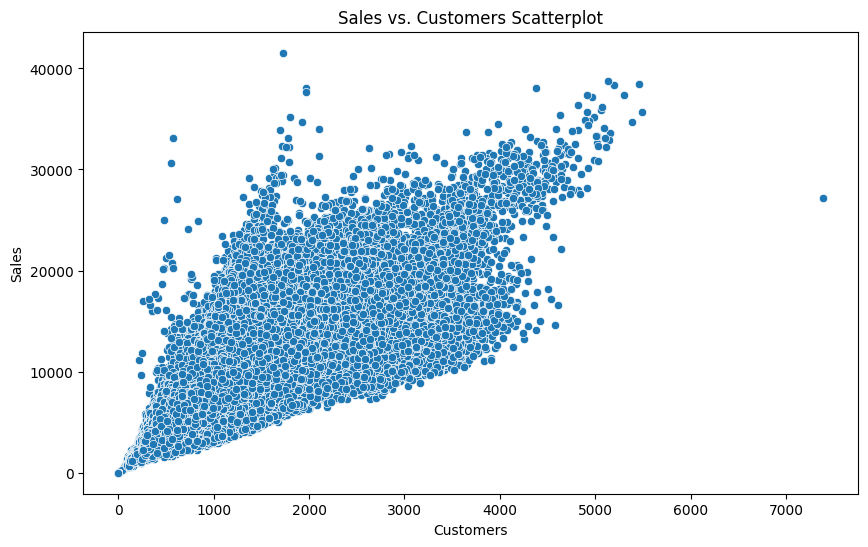

In [59]:
# Plot 22: Sales vs. Customers Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=data)
plt.title('Sales vs. Customers Scatterplot')
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.show()

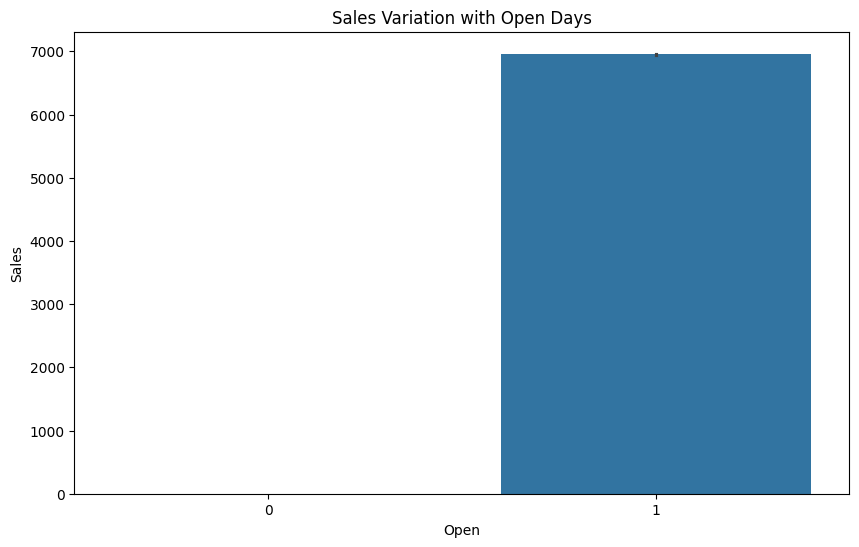

In [60]:
# Plot 23: Sales vs. Open Days
plt.figure(figsize=(10, 6))
sns.barplot(x='Open', y='Sales', data=data)
plt.title('Sales Variation with Open Days')
plt.xlabel('Open')
plt.ylabel('Sales')
plt.show()

#### In the bar plot comparing sales with open days, it appears that when stores are open (coded as '1'), the average sales are higher compared to when stores are closed (coded as '0').

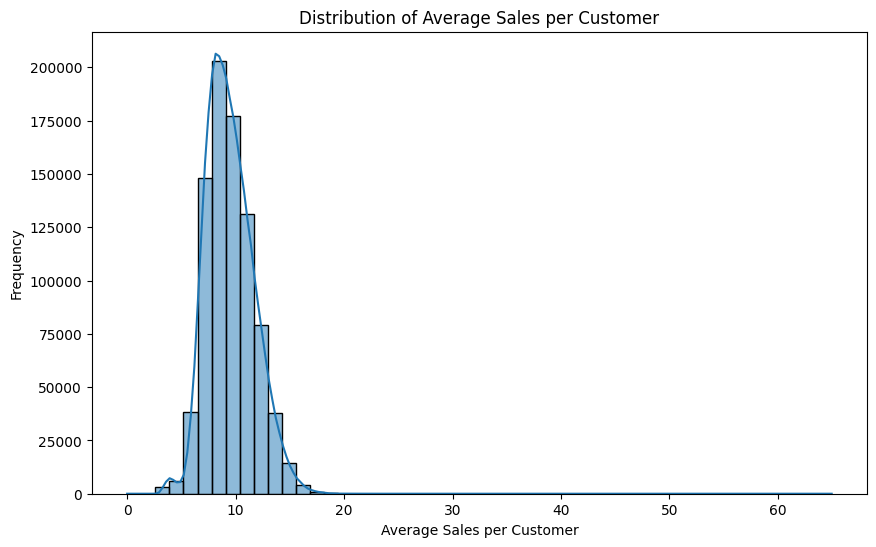

In [61]:
# Plot 24: Distribution of Average Sales per Customer
plt.figure(figsize=(10, 6))
sns.histplot(data['AvgSalesPerCustomer'], bins=50, kde=True)
plt.title('Distribution of Average Sales per Customer')
plt.xlabel('Average Sales per Customer')
plt.ylabel('Frequency')
plt.show()

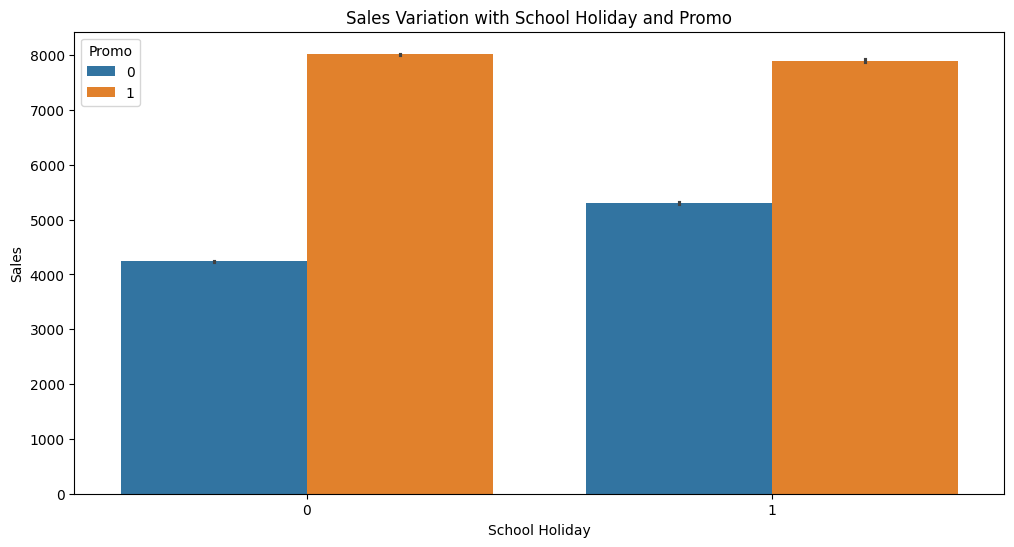

In [62]:
# Plot 25: Boxplot of Sales by School Holiday and Promo
plt.figure(figsize=(12, 6))
sns.barplot(x='SchoolHoliday', y='Sales', hue='Promo', data=data)
plt.title('Sales Variation with School Holiday and Promo')
plt.xlabel('School Holiday')
plt.ylabel('Sales')
plt.show()

#### Impact of School Holidays:

*  School Holiday vs. No School Holiday: Overall, sales appear to be higher during school holidays (represented by the blue bars) compared to periods with no school holidays (orange bars). This suggests that there might be a correlation between school holidays and increased sales, possibly due to factors like:
    * More Time for Shopping: Students might have more free time during school holidays to spend with families or go shopping themselves.
   *  Increased Parental Spending: Parents might be more likely to spend money on their children during school breaks.

#### Impact of Promotions:

*  Promo vs. No Promo: Within each school holiday category (with or without holidays), sales seem to be generally higher during promotions (darker bars) compared to periods with no promotions (lighter bars). This indicates that promotional offers can further increase sales on top of any baseline sales during school holidays.

#### Interaction Between School Holidays and Promotions:

*  Holiday & Promo: The combination of school holidays and promotions (dark blue bars) appears to have the highest sales compared to all other categories. This suggests that these factors have a potentially additive effect, where promotions provide an extra boost to sales during periods of already increased customer activity due to school holidays.

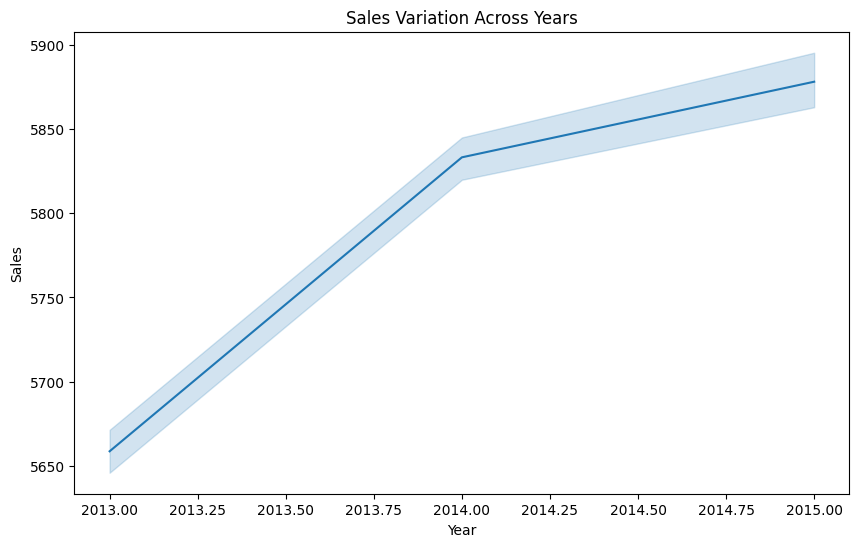

In [63]:
# Plot 26: Sales vs. Year
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='Sales', data=data)
plt.title('Sales Variation Across Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

#### 2015 has high sales variation

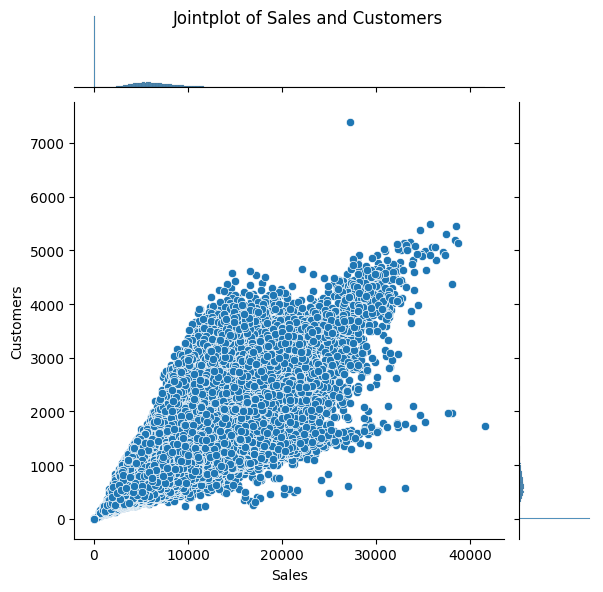

In [64]:
# Plot 28: Jointplot of Sales and Customers
sns.jointplot(x='Sales', y='Customers', data=data, kind='scatter')
plt.suptitle('Jointplot of Sales and Customers')
plt.show()

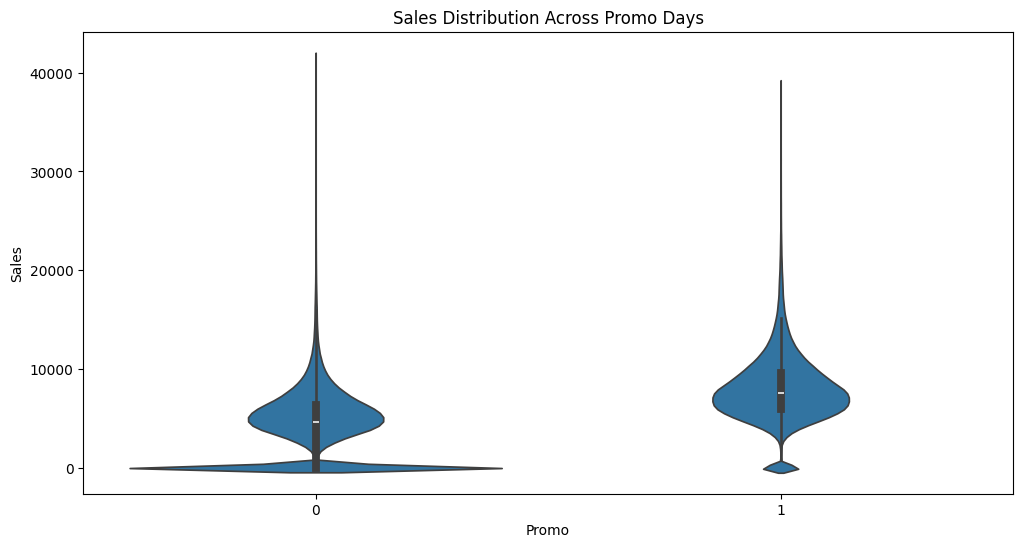

In [65]:
#Plot 29: Violin Plot of Sales Distribution Across Promo Days
plt.figure(figsize=(12, 6))
sns.violinplot(x='Promo', y='Sales', data=data)
plt.title('Sales Distribution Across Promo Days')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

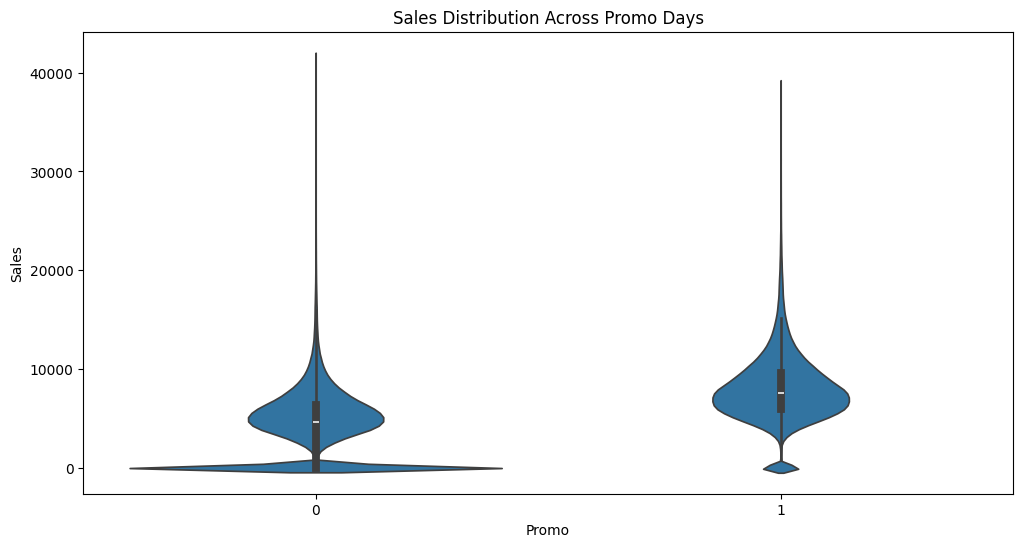

In [66]:
#Plot 29: Violin Plot of Sales Distribution Across Promo Days
plt.figure(figsize=(12, 6))
sns.violinplot(x='Promo', y='Sales', data=data)
plt.title('Sales Distribution Across Promo Days')
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

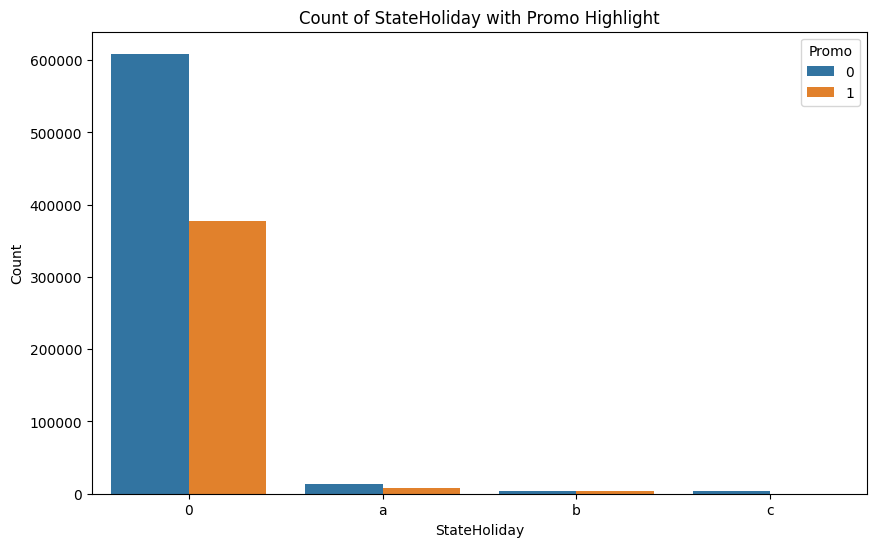

In [67]:
#Plot 30: Countplot of StateHoliday with Promo Highlight
plt.figure(figsize=(10, 6))
sns.countplot(x='StateHoliday', hue='Promo', data=data)
plt.title('Count of StateHoliday with Promo Highlight')
plt.xlabel('StateHoliday')
plt.ylabel('Count')
plt.show()

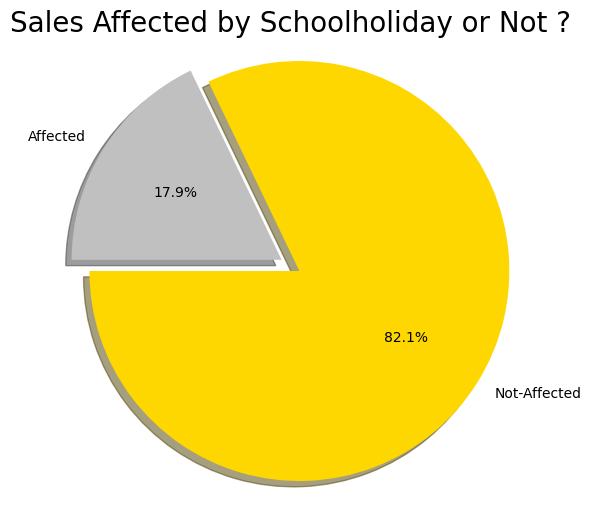

In [68]:
# Plot 33 :Sales Affected by Schoolholiday or Not
labels = 'Not-Affected' , 'Affected'
sizes = data.SchoolHoliday.value_counts()
colors = ['gold', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

#### 17.9% sales Affected by Schoolholiday

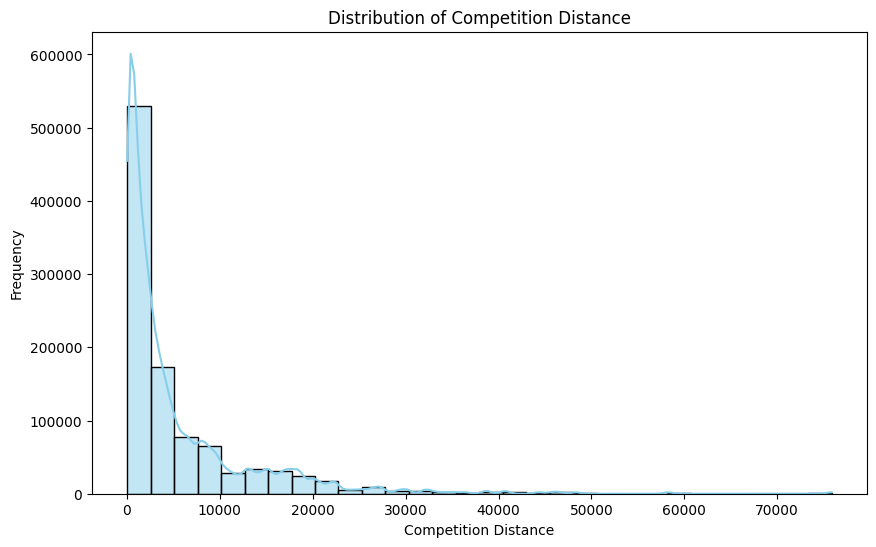

In [69]:
# plot 34: Distribution of Competition Distance
plt.figure(figsize=(10, 6))
sns.histplot(data['CompetitionDistance'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Frequency')
plt.show()

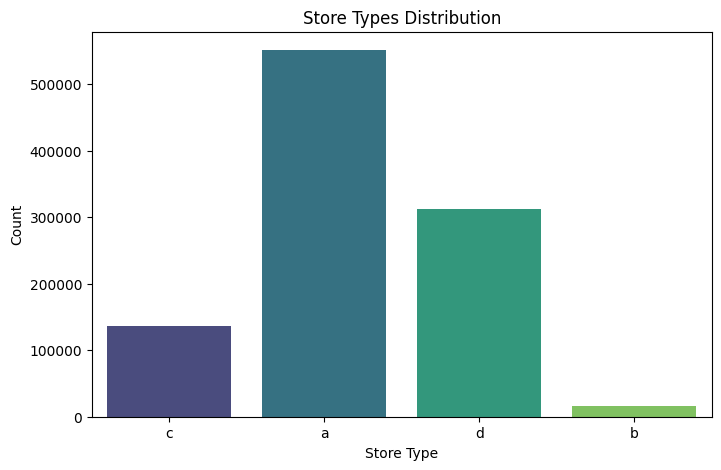

In [70]:
# PLot 34: Store Types Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='StoreType', data=data, palette='viridis')
plt.title('Store Types Distribution')
plt.xlabel('Store Type')
plt.ylabel('Count')
plt.show()

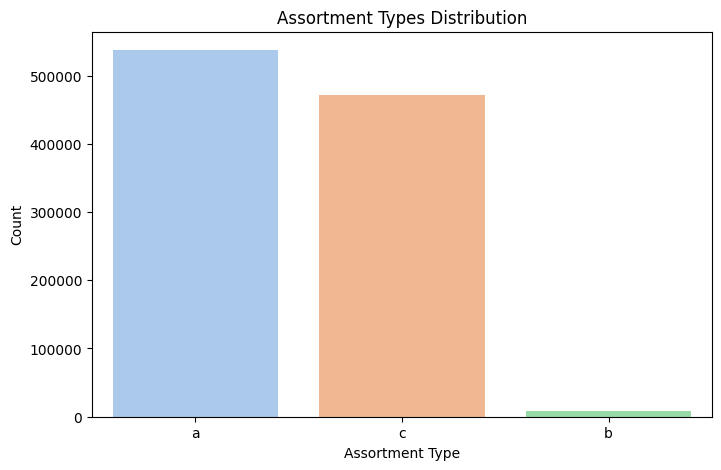

In [71]:
# Plot 35: Assortment Types Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Assortment', data=data, palette='pastel')
plt.title('Assortment Types Distribution')
plt.xlabel('Assortment Type')
plt.ylabel('Count')
plt.show()

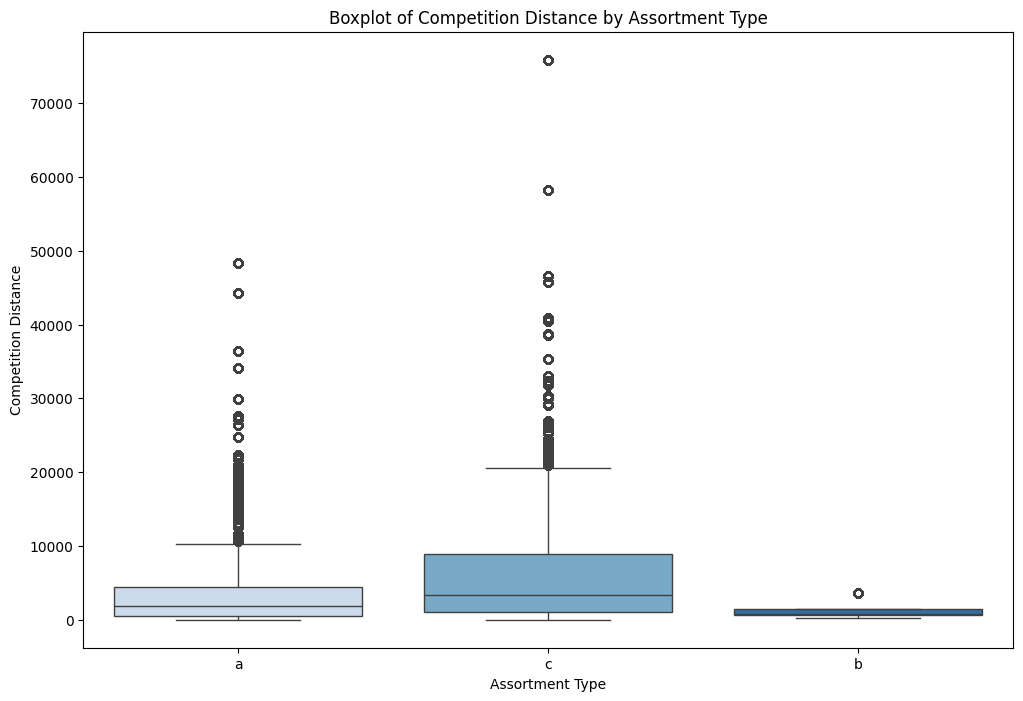

In [72]:
# plot36: Boxplot of Competition Distance by Assortment Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Assortment', y='CompetitionDistance', data=data, palette='Blues')
plt.title('Boxplot of Competition Distance by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Competition Distance')
plt.show()

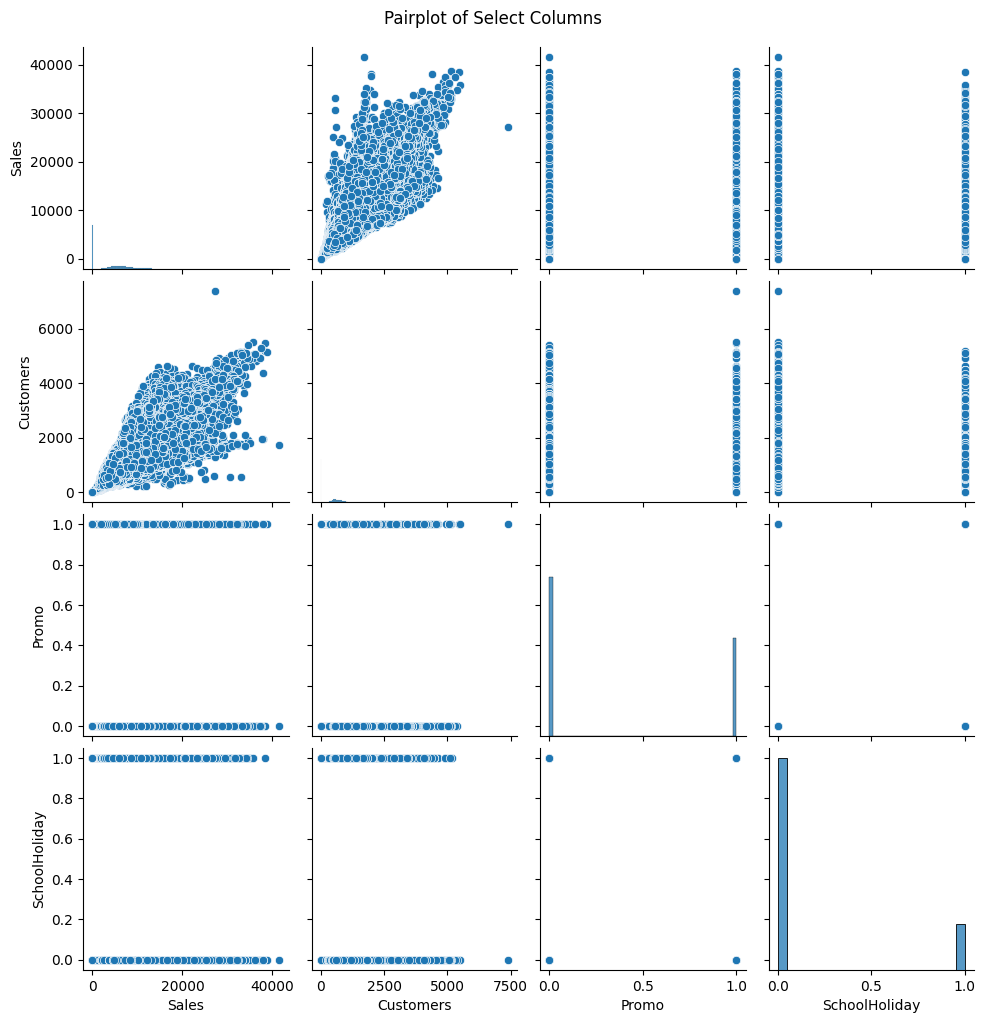

In [73]:
# Plot 37: Pairplot of Select Columns
sns.pairplot(data[['Sales', 'Customers', 'Promo', 'SchoolHoliday']])
plt.suptitle('Pairplot of Select Columns', y=1.02)
plt.show()

###Removing outliers

In [74]:
numeric_columns = data[[
    "Store", "DayOfWeek", "Sales", "Customers", "Open", "Promo", "SchoolHoliday",
    "CompetitionDistance","Promo2"]]

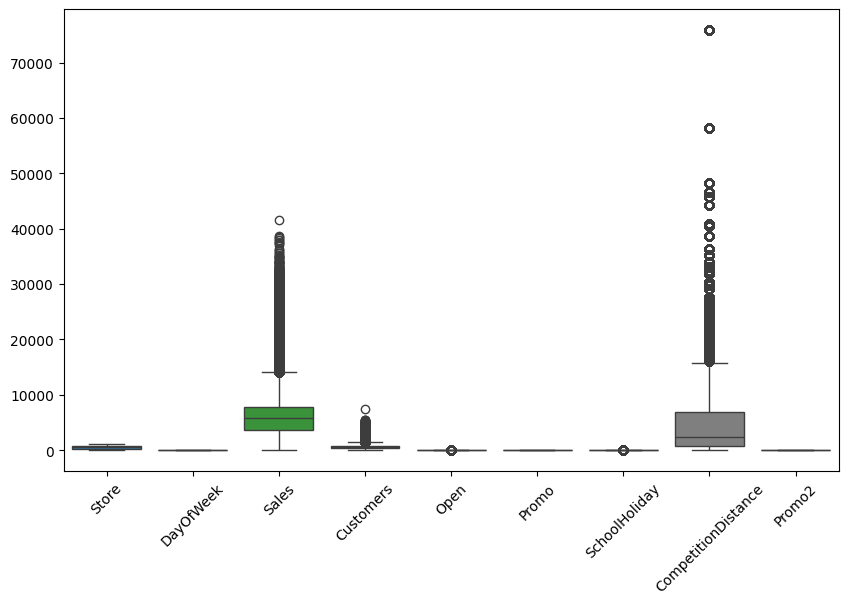

In [75]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_columns, orient='v')
plt.xticks(rotation=45)
plt.show()

In [76]:
# Select the "CompetitionDistance" column from the DataFrame
competition_distance_column = numeric_columns["CompetitionDistance"]

# Calculate the quartiles
Q1 = competition_distance_column.quantile(0.25)
Q3 = competition_distance_column.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the "CompetitionDistance" column
numeric_columns["CompetitionDistance"] = numeric_columns["CompetitionDistance"][~((numeric_columns["CompetitionDistance"] < lower_bound) | (numeric_columns["CompetitionDistance"] > upper_bound))]

In [77]:
# Calculate the median value of the "CompetitionDistance" column
competition_distance_median = numeric_columns["CompetitionDistance"].median()

# Fill missing values in the "CompetitionDistance" column with the median value
numeric_columns["CompetitionDistance"].fillna(competition_distance_median, inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Store                 1017209 non-null  int64         
 1   DayOfWeek             1017209 non-null  int64         
 2   Date                  1017209 non-null  datetime64[ns]
 3   Sales                 1017209 non-null  int64         
 4   Customers             1017209 non-null  int64         
 5   Open                  1017209 non-null  int64         
 6   Promo                 1017209 non-null  int64         
 7   StateHoliday          1017209 non-null  object        
 8   SchoolHoliday         1017209 non-null  int64         
 9   StoreType             1017209 non-null  object        
 10  Assortment            1017209 non-null  object        
 11  CompetitionDistance   1017209 non-null  float64       
 12  Promo2                1017209 non-null  in

In [79]:
# Identify columns with string values
string_columns = data.select_dtypes(include=['object']).columns

# Iterate over each string column and check for non-numeric values
for col in string_columns:
    non_numeric_values = data[col].str.contains(r'[^0-9.-]', na=False)
    if non_numeric_values.any():
        print(f"Column '{col}' contains non-numeric values:")
        print(data[col][non_numeric_values])

Column 'StateHoliday' contains non-numeric values:
63555      a
63557      a
63559      a
63560      a
63563      a
          ..
1017204    a
1017205    a
1017206    a
1017207    a
1017208    a
Name: StateHoliday, Length: 31050, dtype: object
Column 'StoreType' contains non-numeric values:
0          c
1          a
2          a
3          c
4          a
          ..
1017204    a
1017205    c
1017206    a
1017207    a
1017208    d
Name: StoreType, Length: 1017209, dtype: object
Column 'Assortment' contains non-numeric values:
0          a
1          a
2          a
3          c
4          a
          ..
1017204    a
1017205    c
1017206    c
1017207    c
1017208    c
Name: Assortment, Length: 1017209, dtype: object


#### drop columns unwanted

In [81]:
data=data.drop(columns='StateHoliday',axis=1)

In [82]:
data=data.drop(columns='StoreType',axis=1)
data=data.drop(columns='Assortment',axis=1)

In [83]:
data=data.drop(columns='Date',axis=1)

In [84]:
data=data.drop(columns='week_of_year',axis=1)

In [85]:
data=data.drop(columns='TotalSales',axis=1)

In [86]:
data=data.drop(columns='AvgSalesPerCustomer',axis=1)

In [87]:
data=data.drop(columns='SalesCategory_Medium',axis=1)

In [88]:
data=data.drop(columns='SalesCategory_Low',axis=1)

In [89]:
data=data.drop(columns='SalesCategory_High',axis=1)

In [90]:
data=data.drop(columns='DayOfWeek',axis=1)

In [ ]:
data=data.drop(columns='SalesCategory',axis=1)

In [91]:
data.head()

Store  Sales  Customers  Open  Promo  SchoolHoliday  CompetitionDistance  \
0      1   5263        555     1      1              1               1270.0   
1      2   6064        625     1      1              1                570.0   
2      3   8314        821     1      1              1              14130.0   
3      4  13995       1498     1      1              1                620.0   
4      5   4822        559     1      1              1              29910.0   

   Promo2  month  day  year SalesCategory  
0       0      7   31  2015        Medium  
1       1      7   31  2015        Medium  
2       1      7   31  2015        Medium  
3       0      7   31  2015          High  
4       0      7   31  2015           Low

In [92]:
data.columns

Index(['Store', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'month', 'day', 'year',
       'SalesCategory'],
      dtype='object')

In [93]:
X=data[['Store', 'Customers', 'Open', 'Promo', 'SchoolHoliday','CompetitionDistance', 'Promo2', 'month', 'day', 'year']]

In [94]:
y=data['Sales']

#### Splitting x_train and y_train

In [95]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [96]:
# Transforming data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Implementing Supervised Machine Learning algorithms.

###1. Linear Regression (OLS)

In [97]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [98]:
regressor.intercept_

-613.8474442337329

In [99]:
regressor.coef_

array([ -159.23519884, 45908.438295  ,  1707.2288352 ,  1317.16960779,
          46.30214252,  2300.98918602,   250.17763205,   384.84902028,
          55.38392514,   287.17219355])

In [100]:
#checking the score
print("The train score is :", round(regressor.score(X_train_scaled, y_train),2))
print("The test score is :", round(regressor.score(X_test_scaled, y_test),2))

The train score is : 0.86
The test score is : 0.86


In [101]:
y_pred_train_linear=regressor.predict(X_train_scaled)
y_pred_test_linear=regressor.predict(X_test_scaled)

In [102]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_linear_train= mean_squared_error(y_train, y_pred_train_linear)
print("MSE :",MSE_linear_train)

#calculate RMSE
RMSE_linear_train=np.sqrt(MSE_linear_train)
print("RMSE :",RMSE_linear_train)

#calculate MAE
MAE_linear_train= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_linear_train)

#calculate r2 and adjusted r2
R2_linear_train= r2_score(y_train, y_pred_train_linear)
print("R2 :",R2_linear_train)
Adjusted_R2_linear_train = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_linear_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_linear_test= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_linear_test)

#calculate RMSE
RMSE_linear_test=np.sqrt(MSE_linear_test)
print("RMSE :",RMSE_linear_test)

#calculate MAE
MAE_linear_test= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_linear_test)

#calculate r2 and adjusted r2
R2_linear_test= r2_score(y_test, y_pred_test_linear)
print("R2 :",R2_linear_test)

Adjusted_R2_linear_test = (1-(1-r2_score(y_test, y_pred_test_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_linear_test)

Evaluation metrics for training data

MSE : 2124052.9956568894
RMSE : 1457.4131177044103
MAE : 980.8528205104736
R2 : 0.8569913462588951
Adjusted R2 : 0.8569866597861293
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 2110522.9097879366
RMSE : 1452.7638864550345
MAE : 977.7285192330378
R2 : 0.8569163657862023
Adjusted R2 : 0.856911676856285


#Mean of Residuals

In [103]:
residuals_linear_train = y_train - y_pred_train_linear
residuals_linear_test = y_test - y_pred_test_linear

# Calculate mean of residuals
mean_residual_linear_train = np.mean(residuals_linear_train)
mean_residual_linear_test = np.mean(residuals_linear_test)

print('--'*80)
print('Mean of Residuals for Linear Regression (Training Set):', mean_residual_linear_train)
print('Mean of Residuals for Linear Regression (Testing Set):', mean_residual_linear_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean of Residuals for Linear Regression (Training Set): -1.433117775300488e-12
Mean of Residuals for Linear Regression (Testing Set): -0.9751456448319219


Text(0.5, 1.0, 'Actual vs Predicted values')

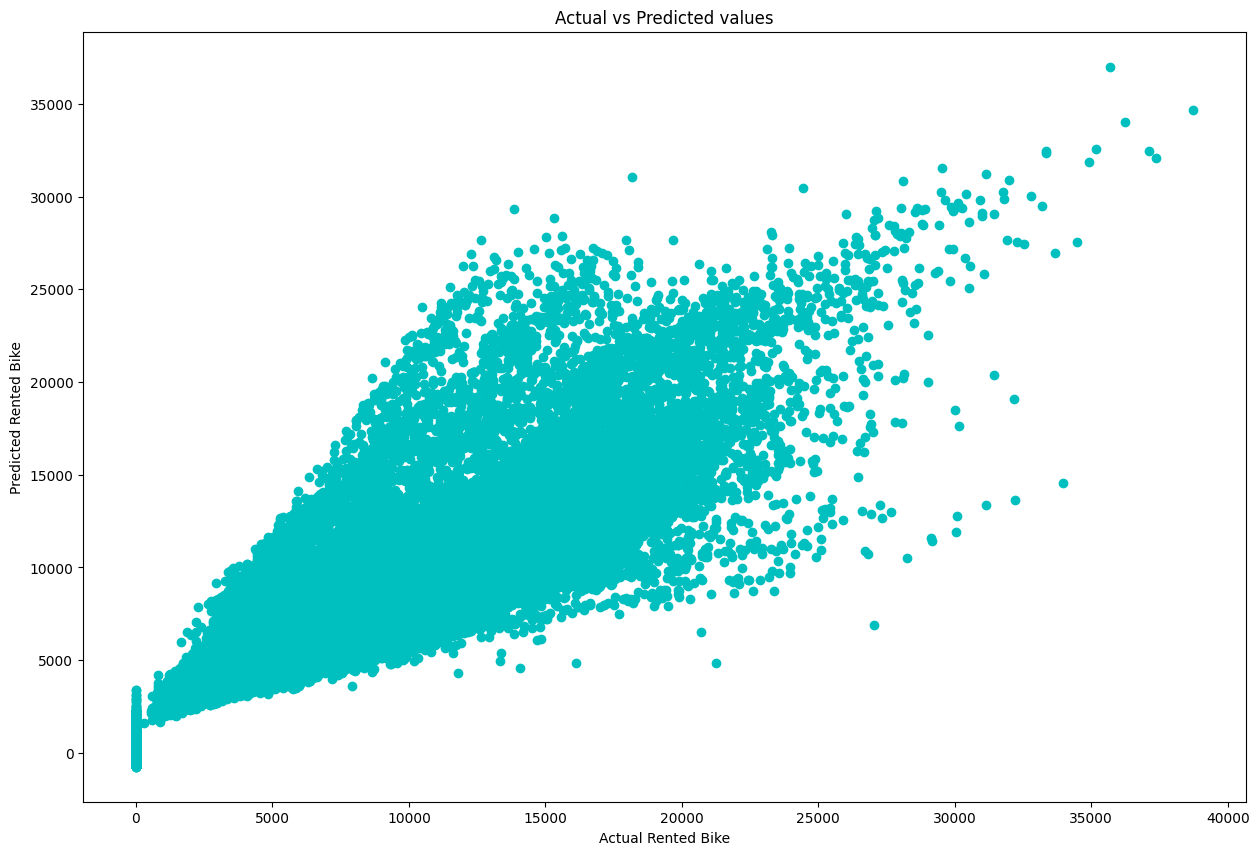

In [104]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_linear,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

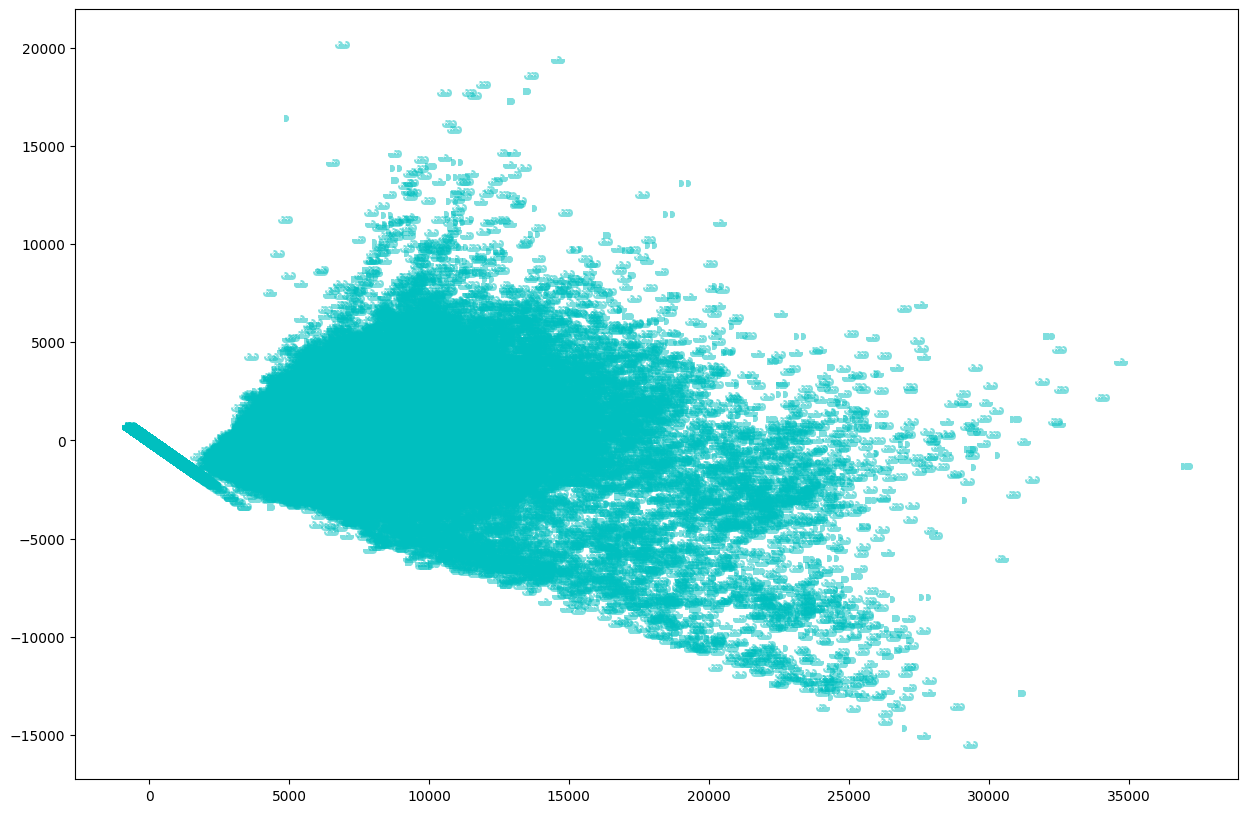

In [105]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_linear,y_test-y_pred_test_linear,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

In [106]:
#storing 100 observations for analysis
simple_lr_pred = y_pred_test_linear[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred})

In [107]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

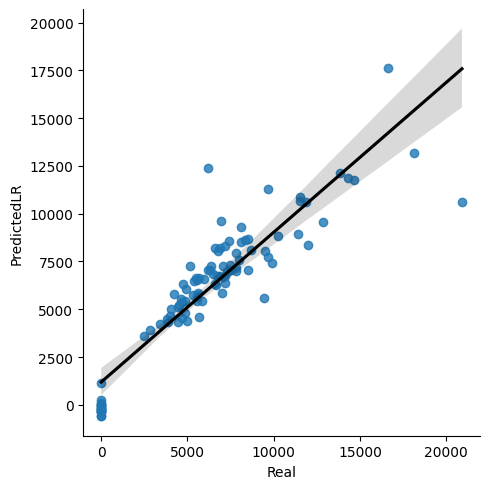

In [108]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

**Inferences On Linear Regression Coefficients**

In [109]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 6.095e+05
Date:                Sun, 14 Apr 2024   Prob (F-statistic):               0.00
Time:                        07:25:56   Log-Likelihood:            -8.8522e+06
No. Observations:             1017209   AIC:                         1.770e+07
Df Residuals:                 1017198   BIC:                         1.770e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.895e+05   3885.731    -74.497      0.000   -2.97e+05   -2.82e+05
Store                  -0.1415      0.004    -31.534      0.000      -0.150      -0.133
Customers               6.2127      0.004   1495.978      0.000       6.205       6.221
Open                 1708.0361      5.000    341.577      0.000    1698.235    1717.837
Promo                1315.9401      3.192    412.211      0.000    1309.683    1322.197
SchoolHoliday          42.3239      3.810     11.109      0.000      34.857      49.791
CompetitionDistance     0.0303      0.000    157.666      0.000       0.030       0.031
Promo2                250.3659      2.983     83.917      0.000     244.518     256.213
month                  34.9149      0.454     76.975      0.000      34.026      35.804
day                     1.6358      0.166      9.868      0.000       1.311       1.961
year                  143.4816      1.929     74.375      0.000     139.700     147.263
==============================================================================
Omnibus:                   187177.276   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4372085.369
Skew:                           0.238   Prob(JB):                         0.00
Kurtosis:                      13.145   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###2. Decision Tree Regression

In [110]:
#Fit Model
dec_regressor = DecisionTreeRegressor(max_depth=50,max_features=20, max_leaf_nodes=200,random_state=0)
dec_regressor=dec_regressor.fit(X_train_scaled, y_train)

In [111]:
#Predict train & test values
y_pred_train_dec = dec_regressor.predict(X_train_scaled)
y_pred_test_dec = dec_regressor.predict(X_test_scaled)

In [112]:
#checking the score
print("The train score is :", round(dec_regressor.score(X_train_scaled, y_train),2))
print("The test score is :", round(dec_regressor.score(X_test_scaled, y_test),2))

The train score is : 0.91
The test score is : 0.91


In [113]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_dec_train= mean_squared_error(y_train, y_pred_train_dec)
print("MSE :",MSE_dec_train)

#calculate RMSE
RMSE_dec_train=np.sqrt(MSE_dec_train)
print("RMSE :",RMSE_dec_train)

#calculate MAE
MAE_dec_train= mean_absolute_error(y_train, y_pred_train_dec)
print("MAE :",MAE_dec_train)

#calculate r2 and adjusted r2
R2_dec_train= r2_score(y_train,y_pred_train_dec)
print("R2 :",R2_dec_train)

Adjusted_R2_dec_train = (1-(1-r2_score(y_train, y_pred_train_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_dec_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_dec_test= mean_squared_error(y_test, y_pred_test_dec)
print("MSE :",MSE_dec_test)

#calculate RMSE
RMSE_dec_test=np.sqrt(MSE_dec_test)
print("RMSE :",RMSE_dec_test)

#calculate MAE
MAE_dec_test= mean_absolute_error(y_test, y_pred_test_dec)
print("MAE :",MAE_dec_test)

#calculate r2 and adjusted r2
R2_dec_test= r2_score(y_test, y_pred_test_dec)
print("R2 :",R2_dec_test)

Adjusted_R2_dec_test = (1-(1-r2_score(y_test, y_pred_test_dec))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_dec_test)

Evaluation metrics for training data

MSE : 1356976.6926594696
RMSE : 1164.8934254512167
MAE : 782.4294208313287
R2 : 0.9086372089716751
Adjusted R2 : 0.9086342149624264
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1370949.7399087637
RMSE : 1170.8756295647986
MAE : 785.452821412446
R2 : 0.9070559858882002
Adjusted R2 : 0.9070529400613955


#Mean of Residual

In [114]:
# Calculate residuals for both training and testing sets for Decision Tree
residuals_dec_train = y_train - y_pred_train_dec
residuals_dec_test = y_test - y_pred_test_dec

# Calculate mean of residuals for Decision Tree
mean_residual_dec_train = np.mean(residuals_dec_train)
mean_residual_dec_test = np.mean(residuals_dec_test)

print('--'*80)
print('Mean of Residuals for Decision Tree (Training Set):', mean_residual_dec_train)
print('Mean of Residuals for Decision Tree (Testing Set):', mean_residual_dec_test)

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Mean of Residuals for Decision Tree (Training Set): -3.8533516322099555e-14
Mean of Residuals for Decision Tree (Testing Set): -0.00047900641503030865


Text(0.5, 1.0, 'Actual vs Predicted values')

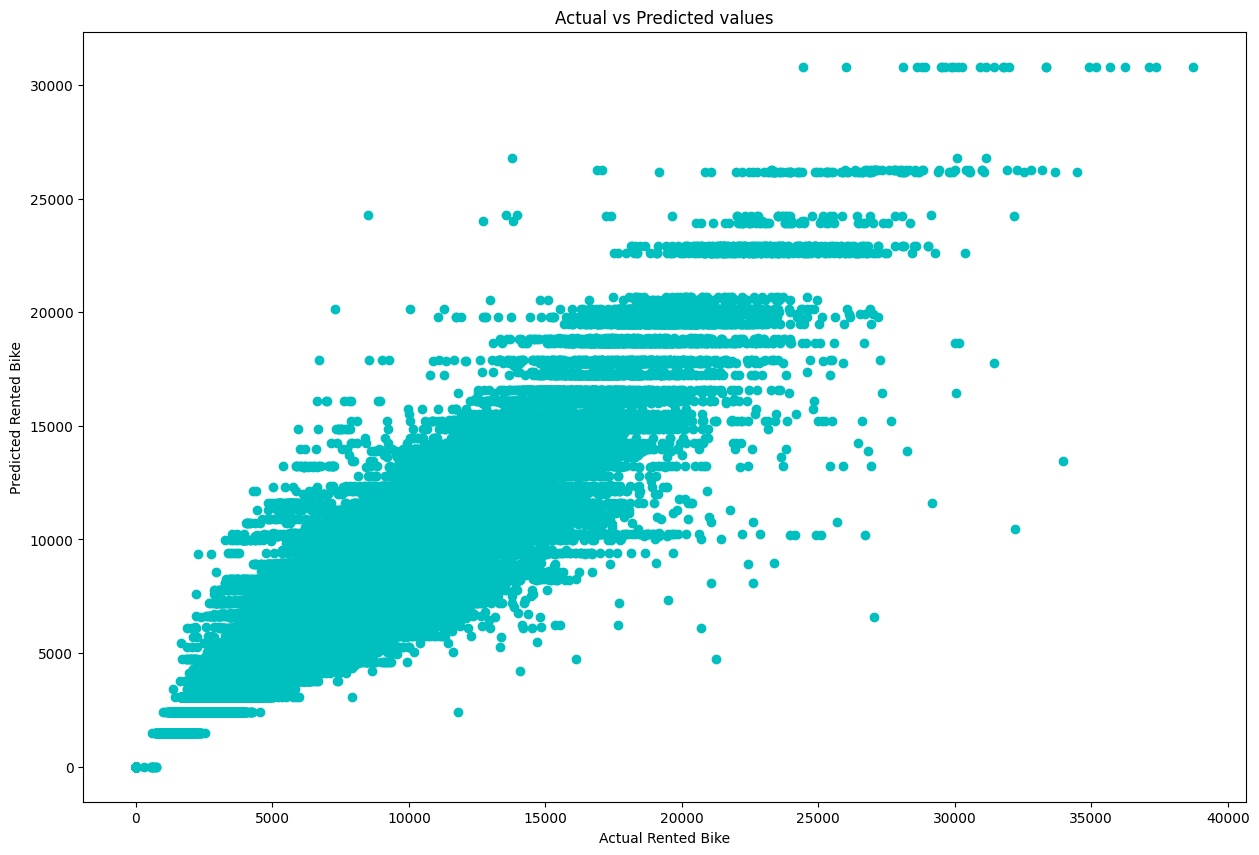

In [115]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_dec,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

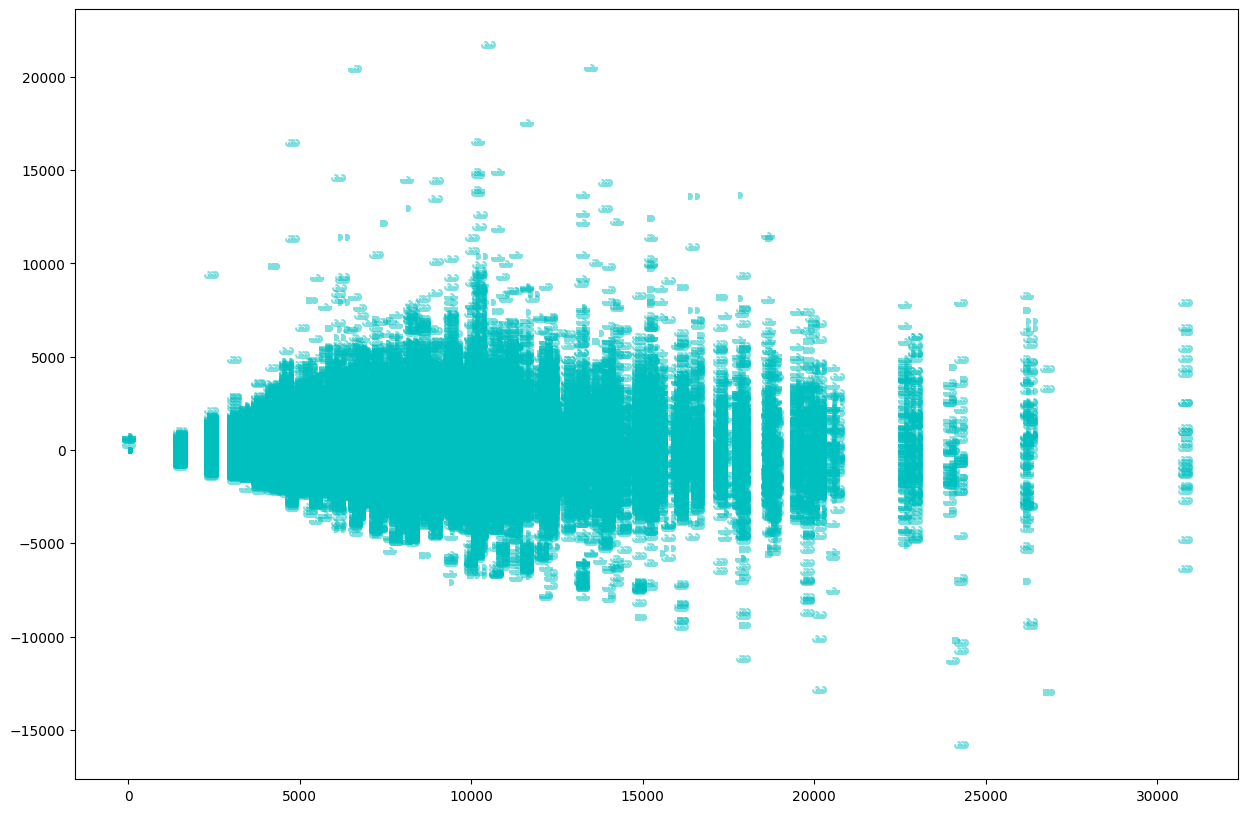

In [116]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_dec,y_test-y_pred_test_dec,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Lasso Regression (L1 Regularization)

In [117]:
#Training the lasso regression model using GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
lasso_model_grid = GridSearchCV(lasso, parameters,scoring='neg_mean_squared_error', cv=5)
lasso_model_grid=lasso_model_grid.fit(X_train_scaled,y_train)

In [118]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in lasso regression is: {lasso_model_grid.best_params_}')
print(f'Using {lasso_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {lasso_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in lasso regression is: {'alpha': 0.01}
Using {'alpha': 0.01} as the value of aplha gives us a negative mean squared error of: -2124186.8275890984


In [119]:
#Fit Model
lasso_model=Lasso(alpha=0.01).fit(X_train,y_train)

In [120]:
#Predict train & test values
y_pred_train_lasso=lasso_model.predict(X_train)
y_pred_test_lasso=lasso_model.predict(X_test)

In [121]:
#checking the score
print("The train score is :", round(lasso_model.score(X_train, y_train),2))
print("The test score is :", round(lasso_model.score(X_test, y_test),2))

The train score is : 0.86
The test score is : 0.86


In [122]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_lasso_train= mean_squared_error(y_train, y_pred_train_lasso)
print("MSE :",MSE_lasso_train)

#calculate RMSE
RMSE_lasso_train=np.sqrt(MSE_lasso_train)
print("RMSE :",RMSE_lasso_train)

#calculate MAE
MAE_lasso_train= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso_train)

#calculate r2 and adjusted r2
R2_lasso_train= r2_score(y_train,y_pred_train_lasso)
print("R2 :",R2_lasso_train)
Adjusted_R2_lasso_train = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_lasso_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_lasso_test= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso_test)

#calculate RMSE
RMSE_lasso_test=np.sqrt(MSE_lasso_test)
print("RMSE :",RMSE_lasso_test)

#calculate MAE
MAE_lasso_test= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso_test)

#calculate r2 and adjusted r2
R2_lasso_test= r2_score(y_test, y_pred_test_lasso)
print("R2 :",R2_lasso_test)
Adjusted_R2_lasso_test = (1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lasso_test)

Evaluation metrics for training data

MSE : 2124052.9981398443
RMSE : 1457.4131185562467
MAE : 980.8457221761339
R2 : 0.8569913460917222
Adjusted R2 : 0.856986659618951
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 2110522.606759344
RMSE : 1452.7637821612102
MAE : 977.7214094786336
R2 : 0.856916386330131
Adjusted R2 : 0.8569116974008869


Text(0.5, 1.0, 'Actual vs Predicted values')

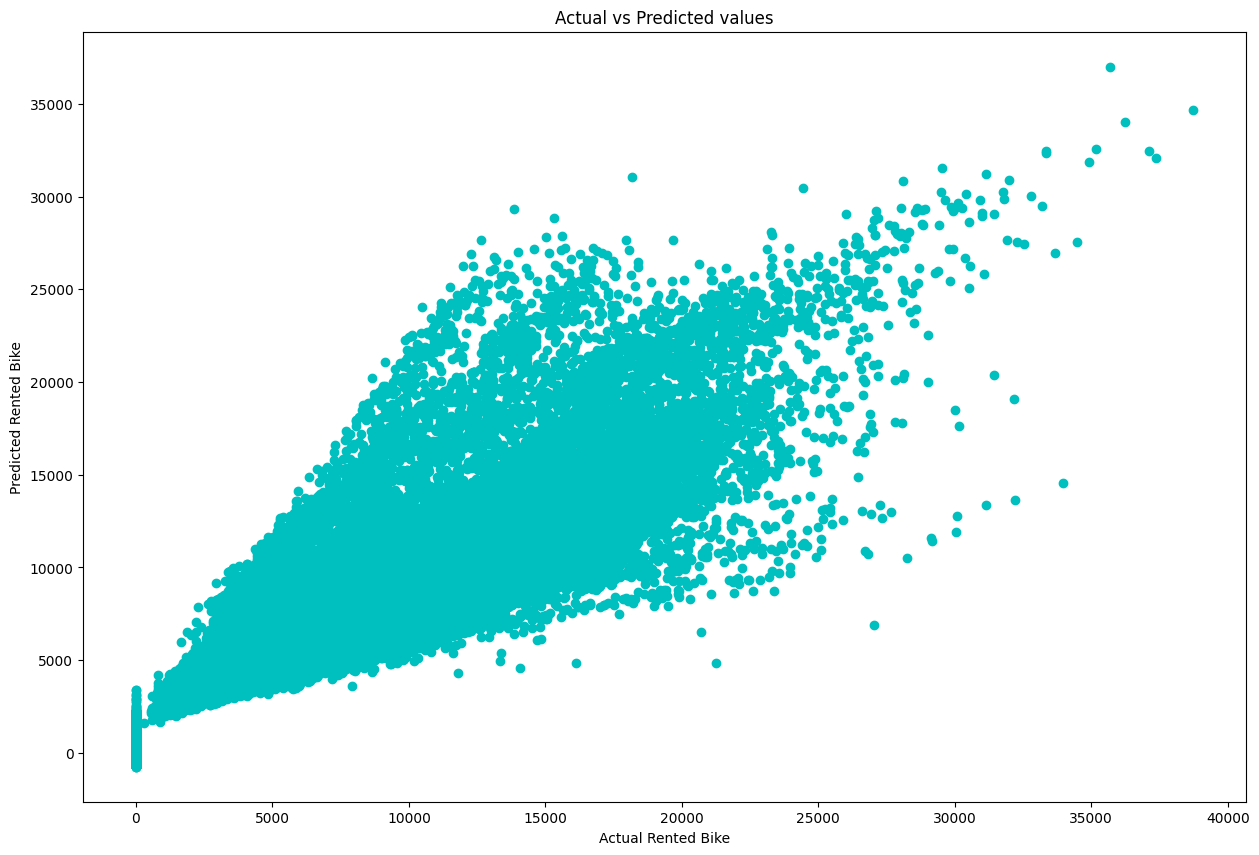

In [123]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_lasso,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

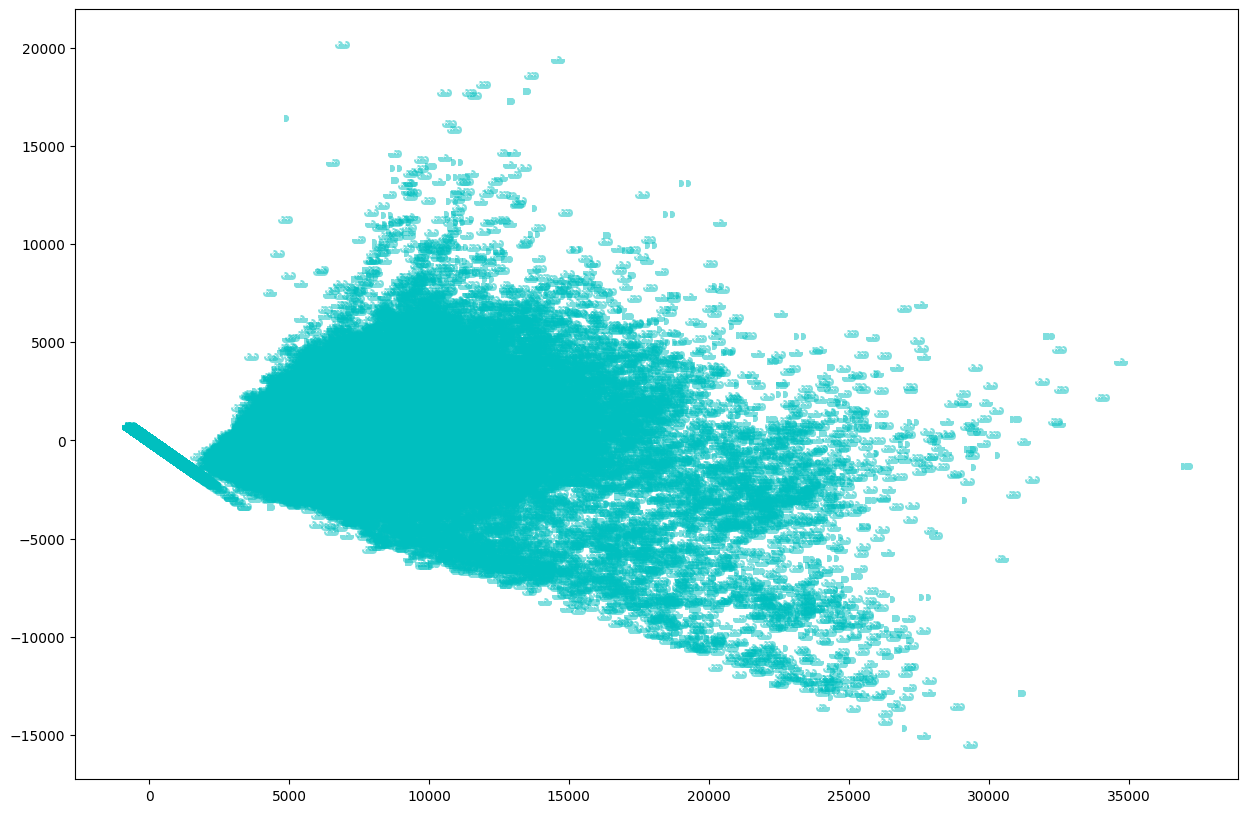

In [124]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_lasso,y_test-y_pred_test_lasso,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#RIDGE REGRESSION (L2 Regularization)

In [125]:
#Training the ridge regression model using GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
ridge_model_grid = GridSearchCV(ridge, parameters,scoring='neg_mean_squared_error', cv=5)
ridge_model_grid=ridge_model_grid.fit(X_train_scaled,y_train)

In [126]:
#Getting the best parameters for Ridge regression fetched through GridSearchCV
print(f'Through GridSearchCV, the optimal value for alpha in ridge regression is: {ridge_model_grid.best_params_}')
print(f'Using {ridge_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {ridge_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in ridge regression is: {'alpha': 0.05}
Using {'alpha': 0.05} as the value of aplha gives us a negative mean squared error of: -2124187.0791657376


In [127]:
#Fit Model
ridge_model=Ridge(alpha=0.01).fit(X_train,y_train)

In [128]:
#Predict train & test values
y_pred_train_ridge=ridge_model.predict(X_train)
y_pred_test_ridge=ridge_model.predict(X_test)

In [129]:
#checking the score
print("The train score is :", round(ridge_model.score(X_train, y_train),2))
print("The test score is :", round(ridge_model.score(X_test, y_test),2))

The train score is : 0.86
The test score is : 0.86


In [130]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_ridge_train= mean_squared_error(y_train, y_pred_train_ridge)
print("MSE :",MSE_ridge_train)

#calculate RMSE
RMSE_ridge_train=np.sqrt(MSE_ridge_train)
print("RMSE :",RMSE_ridge_train)

#calculate MAE
MAE_ridge_train= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_ridge_train)

#calculate r2 and adjusted r2
R2_ridge_train= r2_score(y_train,y_pred_train_ridge)
print("R2 :",R2_ridge_train)
Adjusted_R2_ridge_train = (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_ridge_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_ridge_test= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_ridge_test)

#calculate RMSE
RMSE_ridge_test=np.sqrt(MSE_ridge_test)
print("RMSE :",RMSE_ridge_test)

#calculate MAE
MAE_ridge_test= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_ridge_test)

#calculate r2 and adjusted r2
R2_ridge_test= r2_score(y_test, y_pred_test_ridge)
print("R2 :",R2_ridge_test)
Adjusted_R2_ridge_test = (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_ridge_test)

Evaluation metrics for training data

MSE : 2124052.9956568987
RMSE : 1457.4131177044135
MAE : 980.852807176415
R2 : 0.8569913462588945
Adjusted R2 : 0.8569866597861288
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 2110522.9097524956
RMSE : 1452.7638864428368
MAE : 977.728505895434
R2 : 0.8569163657886051
Adjusted R2 : 0.8569116768586877


Text(0.5, 1.0, 'Actual vs Predicted values')

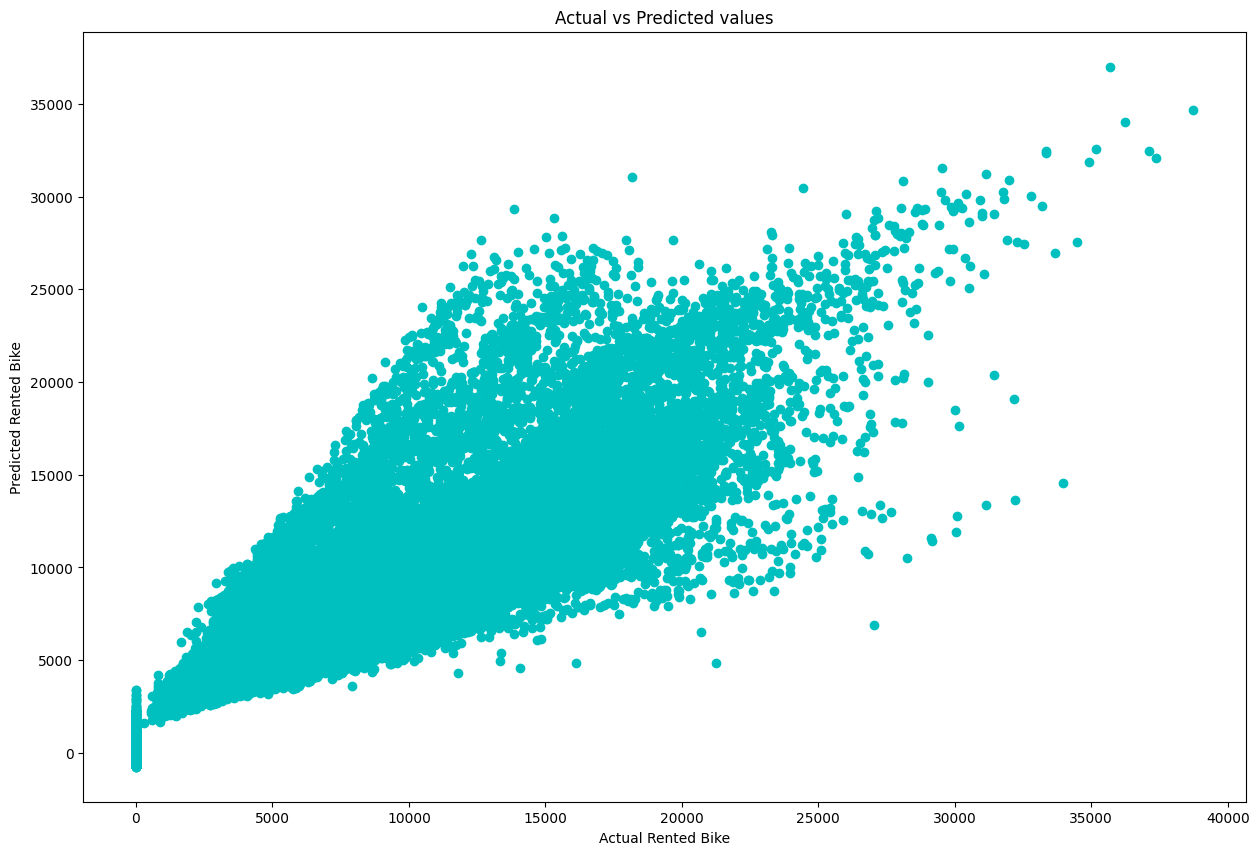

In [131]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_ridge,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

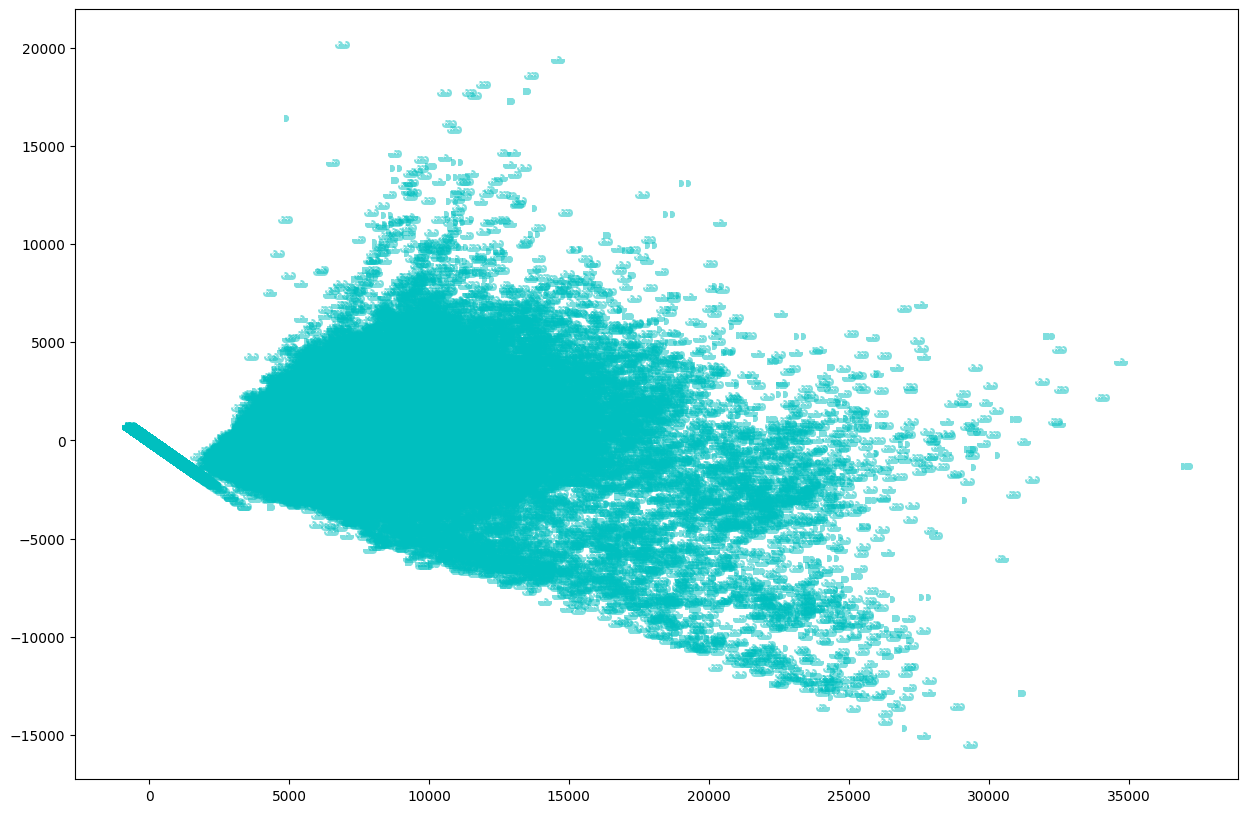

In [132]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_ridge,y_test-y_pred_test_ridge,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Elastic Net Regression

In [133]:
#Training the ElasticNet regression model using GridSearchCV
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)

elastic = ElasticNet()
parameters = {'alpha': [1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01],'l1_ratio':[0.1,0.2,0.3,0.4,0.5]}
elastic_model_grid = GridSearchCV(elastic, parameters,scoring='neg_mean_squared_error', cv=5)
elastic_model_grid=elastic_model_grid.fit(X_train,y_train)

In [134]:
#Getting the best parameters for elastcinet regression
print(f'Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {elastic_model_grid.best_params_}')
print(f'Using {elastic_model_grid.best_params_} as the value of aplha gives us a negative mean squared error of: {elastic_model_grid.best_score_}')

Through GridSearchCV, the optimal value for alpha in elasticnet regression is: {'alpha': 0.01, 'l1_ratio': 0.5}
Using {'alpha': 0.01, 'l1_ratio': 0.5} as the value of aplha gives us a negative mean squared error of: -2125059.5465634754


In [135]:
#Fitting the elastic regression model
elasticnet_model=ElasticNet(alpha=0.01,l1_ratio=0.1).fit(X_train,y_train)

In [136]:
#Predict train & test values
y_pred_train_elastic=elasticnet_model.predict(X_train)
y_pred_test_elastic=elasticnet_model.predict(X_test)

In [137]:
#checking the score
print("The train score is :", round(elasticnet_model.score(X_train, y_train),2))
print("The test score is :", round(elasticnet_model.score(X_test, y_test),2))

The train score is : 0.86
The test score is : 0.86


In [138]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_elastic_train= mean_squared_error(y_train, y_pred_train_elastic)
print("MSE :",MSE_elastic_train)

#calculate RMSE
RMSE_elastic_train=np.sqrt(MSE_elastic_train)
print("RMSE :",RMSE_elastic_train)

#calculate MAE
MAE_elastic_train= mean_absolute_error(y_train, y_pred_train_elastic)
print("MAE :",MAE_elastic_train)

#calculate r2 and adjusted r2
R2_elastic_train= r2_score(y_train,y_pred_train_elastic)
print("R2 :",R2_elastic_train)
Adjusted_R2_elastic_train = (1-(1-r2_score(y_train, y_pred_train_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_elastic_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_elastic_test= mean_squared_error(y_test, y_pred_test_elastic)
print("MSE :",MSE_elastic_test)

#calculate RMSE
RMSE_elastic_test=np.sqrt(MSE_elastic_test)
print("RMSE :",RMSE_elastic_test)

#calculate MAE
MAE_elastic_test= mean_absolute_error(y_test, y_pred_test_elastic)
print("MAE :",MAE_elastic_test)

#calculate r2 and adjusted r2
R2_elastic_test= r2_score(y_test, y_pred_test_elastic)
print("R2 :",R2_elastic_test)
Adjusted_R2_elastic_test = (1-(1-r2_score(y_test, y_pred_test_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_elastic_test)

Evaluation metrics for training data

MSE : 2126679.0635461947
RMSE : 1458.3137740370537
MAE : 974.9714014674591
R2 : 0.8568145378486294
Adjusted R2 : 0.8568098455817541
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 2113117.6209862716
RMSE : 1453.6566379259827
MAE : 971.8135902280769
R2 : 0.8567404564386794
Adjusted R2 : 0.8567357617441153


###3. Random Forest Regressor

In [139]:
# Creating the Random Forest model with default hyperparameters
rf_model = RandomForestRegressor()
# Fitting the model to the training data
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [140]:
# Predict train & test values
y_pred_train_rf = rf_model.predict(X_train_scaled)
y_pred_test_rf = rf_model.predict(X_test_scaled)

In [141]:
# Checking the score
print("The train score is :", round(rf_model.score(X_train_scaled, y_train), 2))
print("The test score is :", round(rf_model.score(X_test_scaled, y_test), 2))

The train score is : 1.0
The test score is : 0.98


In [142]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_rf_train= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf_train)

#calculate RMSE
RMSE_rf_train=np.sqrt(MSE_rf_train)
print("RMSE :",RMSE_rf_train)

#calculate MAE
MAE_rf_train= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf_train)

#calculate r2 and adjusted r2
R2_rf_train= r2_score(y_train,y_pred_train_rf)
print("R2 :",R2_rf_train)

Adjusted_R2_rf_train = (1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_rf_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_rf_test= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf_test)

#calculate RMSE
RMSE_rf_test=np.sqrt(MSE_rf_test)
print("RMSE :",RMSE_rf_test)

#calculate MAE
MAE_rf_test= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf_test)

#calculate r2 and adjusted r2
R2_rf_test= r2_score(y_test, y_pred_test_rf)
print("R2 :",R2_rf_test)

Adjusted_R2_rf_test = (1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_rf_test)

Evaluation metrics for training data

MSE : 34786.74067942323
RMSE : 186.5120389664518
MAE : 110.48477747224199
R2 : 0.9976578715489786
Adjusted R2 : 0.9976577947961324
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 249993.29662916542
RMSE : 499.99329658422965
MAE : 296.46823933438856
R2 : 0.9830516175660073
Adjusted R2 : 0.9830510621581308


#Mean of Residuals

In [143]:
# Calculate residuals for both training and testing sets
residuals_rf_train = y_train - y_pred_train_rf
residuals_rf_test = y_test - y_pred_test_rf

# Calculate mean of residuals
mean_residual_rf_train = np.mean(residuals_rf_train)
mean_residual_rf_test = np.mean(residuals_rf_test)

print('Mean of Residuals for Random Forest (Training Set):', mean_residual_rf_train)
print('Mean of Residuals for Random Forest (Testing Set):', mean_residual_rf_test)

Mean of Residuals for Random Forest (Training Set): 1.9795105934167165
Mean of Residuals for Random Forest (Testing Set): 5.863940517035158


Text(0.5, 1.0, 'Actual vs Predicted values')

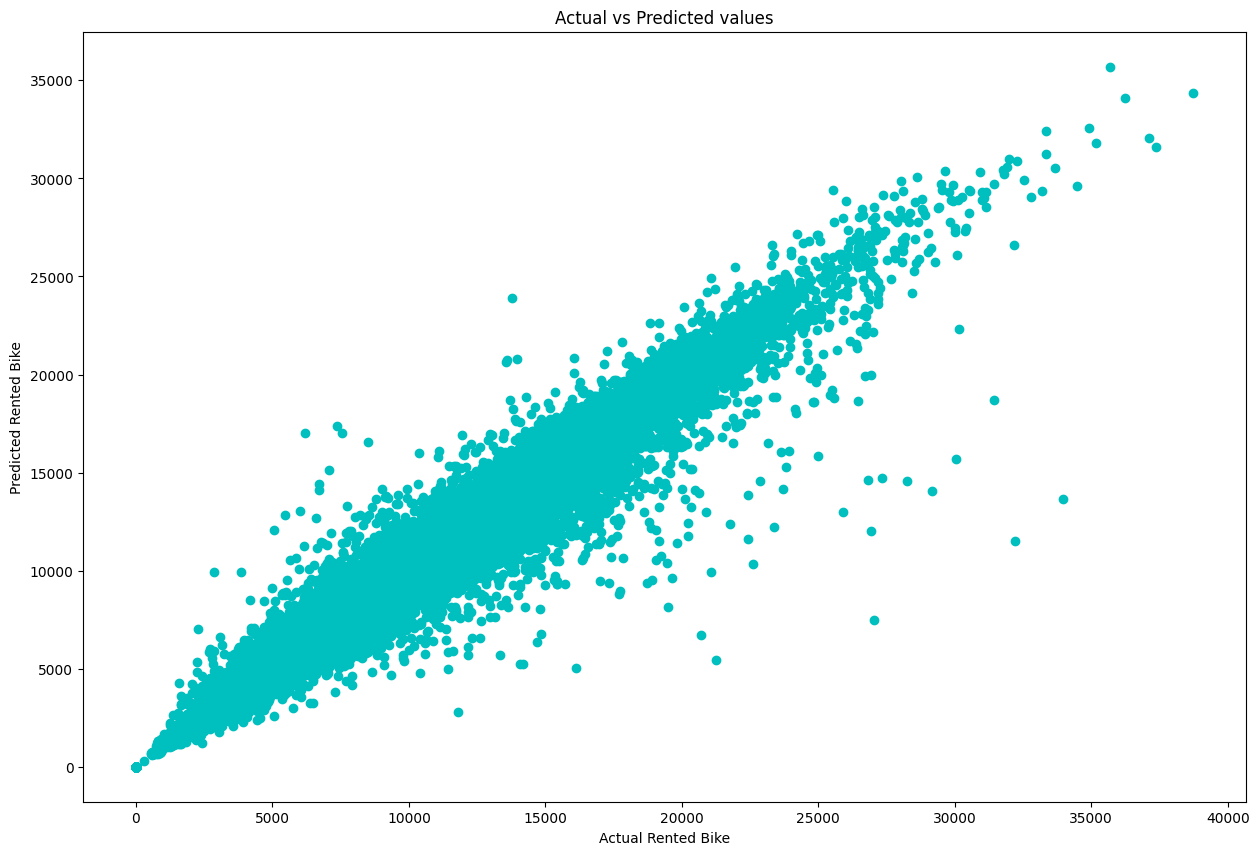

In [144]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_rf,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

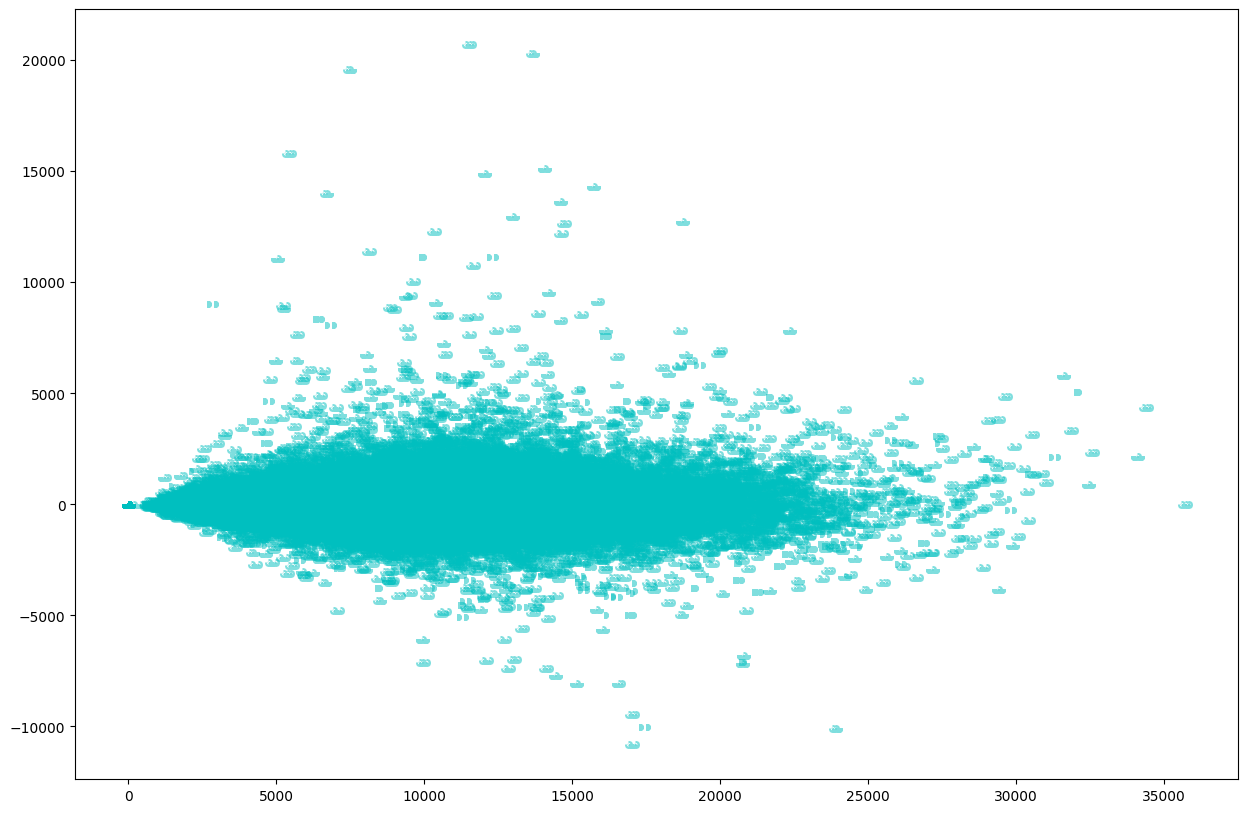

In [145]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_rf,y_test-y_pred_test_rf,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###4. GRADIENT BOOSTING

In [146]:
# Create the GradientBoostingRegressor with specified hyperparameters
gb_regressor = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_samples_split=2,
    min_samples_leaf=1,
    subsample=1.0,
    random_state=0
)

In [147]:
# Create an instance of the GradientBoostingRegressor
gb_regressor = GradientBoostingRegressor()
gb_regressor=gb_regressor.fit(X_train_scaled,y_train)

In [148]:
#Predict train & test values
y_pred_train_gb = gb_regressor.predict(X_train_scaled)
y_pred_test_gb = gb_regressor.predict(X_test_scaled)

In [149]:
#checking the score
print("The train score is :", round(gb_regressor.score(X_train_scaled, y_train),2))
print("The test score is :", round(gb_regressor.score(X_test_scaled, y_test),2))

The train score is : 0.91
The test score is : 0.91


In [150]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_gb_train= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb_train)

#calculate RMSE
RMSE_gb_train=np.sqrt(MSE_gb_train)
print("RMSE :",RMSE_gb_train)

#calculate MAE
MAE_gb_train= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb_train)

#calculate r2 and adjusted r2
R2_gb_train= r2_score(y_train,y_pred_train_gb)
print("R2 :",R2_gb_train)

Adjusted_R2_gb_train = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_gb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_gb_test= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb_test)

#calculate RMSE
RMSE_gb_test=np.sqrt(MSE_gb_test)
print("RMSE :",RMSE_gb_test)

#calculate MAE
MAE_gb_test= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb_test)

#calculate r2 and adjusted r2
R2_gb_test= r2_score(y_test, y_pred_test_gb)
print("R2 :",R2_gb_test)

Adjusted_R2_gb_test = (1-(1-r2_score(y_test, y_pred_test_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_gb_test)

Evaluation metrics for training data

MSE : 1356278.4320926894
RMSE : 1164.5936768215297
MAE : 782.4475615346684
R2 : 0.9086842215950983
Adjusted R2 : 0.9086812291264792
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1353985.8391889082
RMSE : 1163.6089717722652
MAE : 782.2570930632173
R2 : 0.9082060594335677
Adjusted R2 : 0.9082030512953099


#Mean of Residuals

In [151]:
# Calculate residuals for both training and testing sets
residuals_gb_train = y_train - y_pred_train_gb
residuals_gb_test = y_test - y_pred_test_gb

# Calculate mean of residuals
mean_residual_gb_train = np.mean(residuals_gb_train)
mean_residual_gb_test = np.mean(residuals_gb_test)

print('Mean of Residuals for Gradient Boosting (Training Set):', mean_residual_gb_train)
print('Mean of Residuals for Gradient Boosting (Testing Set):', mean_residual_gb_test)

Mean of Residuals for Gradient Boosting (Training Set): -3.693944882110578e-15
Mean of Residuals for Gradient Boosting (Testing Set): 0.8136082779773502


Text(0.5, 1.0, 'Actual vs Predicted values')

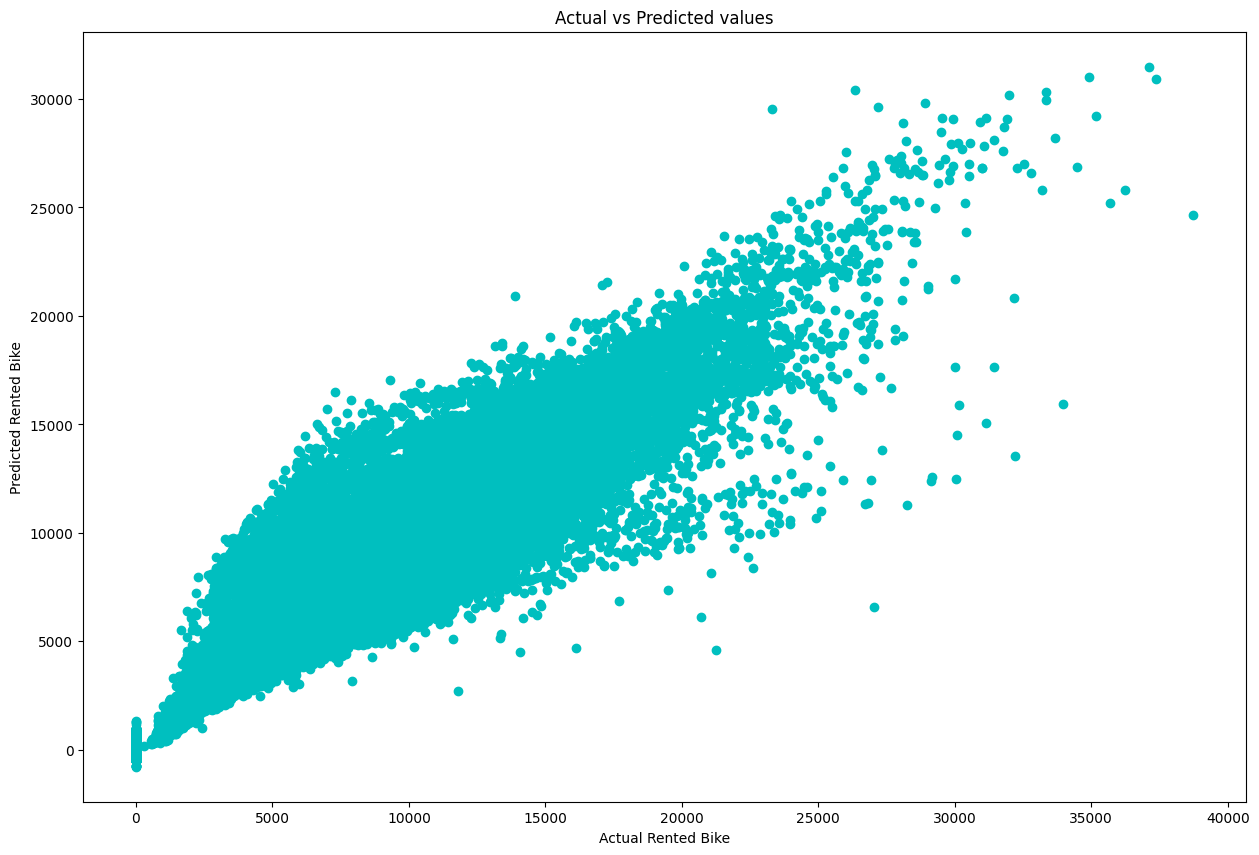

In [152]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_gb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

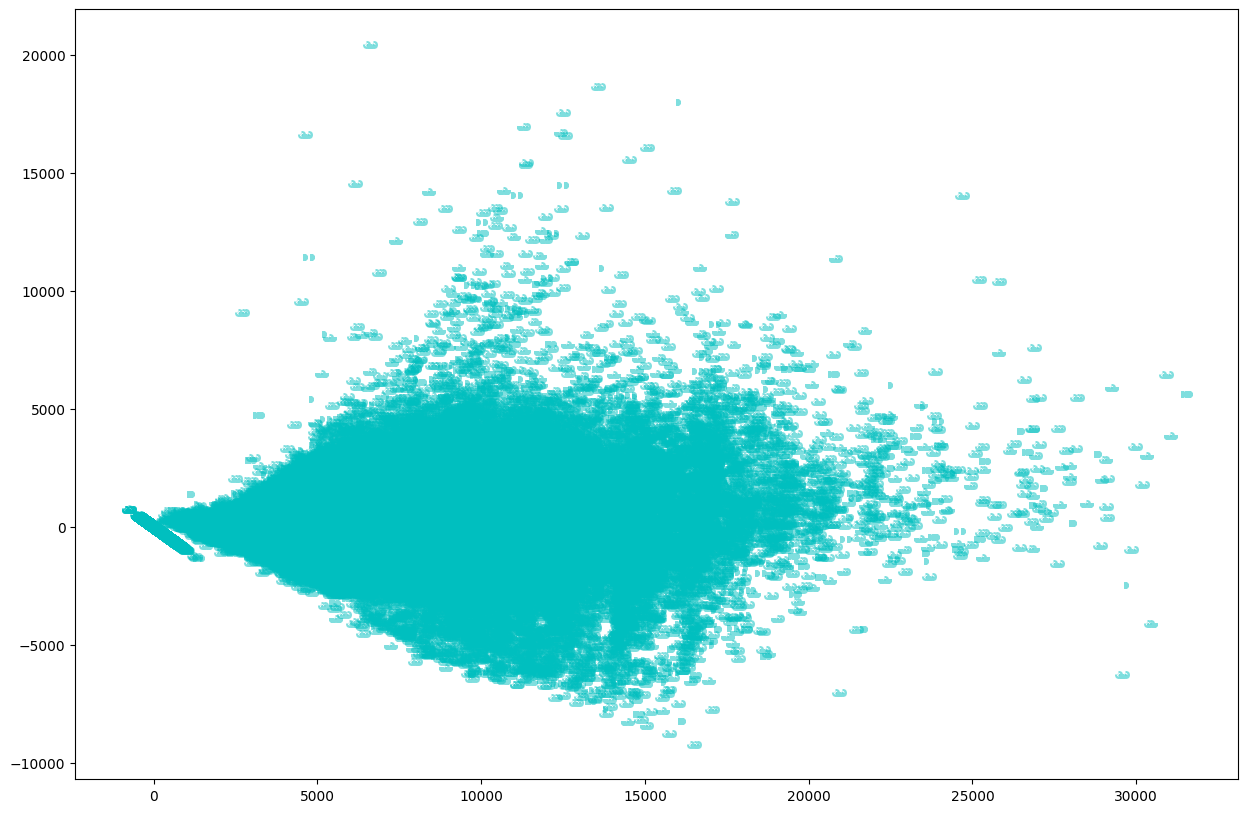

In [153]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_gb,y_test-y_pred_test_gb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

###5. XG Boost

In [154]:
# Create the XGBRegressor with specified hyperparameters
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=1,
    subsample=1.0,
    colsample_bytree=1.0,
    gamma=0,
    random_state=0
)

In [155]:
# Fitting the model to the training data
xgb_model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [156]:
# Predict train & test values
y_pred_train_xgb = xgb_model.predict(X_train_scaled)
y_pred_test_xgb = xgb_model.predict(X_test_scaled)

In [157]:
# Checking the score
print("The train score is :", round(xgb_model.score(X_train_scaled, y_train), 2))
print("The test score is :", round(xgb_model.score(X_test_scaled, y_test), 2))

The train score is : 0.91
The test score is : 0.91


In [158]:
print('Evaluation metrics for training data\n')
#calculate MSE
MSE_xgb_train= mean_squared_error(y_train, y_pred_train_xgb)
print("MSE :",MSE_xgb_train)

#calculate RMSE
RMSE_xgb_train=np.sqrt(MSE_xgb_train)
print("RMSE :",RMSE_xgb_train)

#calculate MAE
MAE_xgb_train= mean_absolute_error(y_train, y_pred_train_xgb)
print("MAE :",MAE_xgb_train)

#calculate r2 and adjusted r2
R2_xgb_train= r2_score(y_train,y_pred_train_xgb)
print("R2 :",R2_xgb_train)

Adjusted_R2_xgb_train = (1-(1-r2_score(y_train, y_pred_train_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",Adjusted_R2_xgb_train)

print('--'*80)

print('Evaluation metrics for testing data\n')

#calculate MSE
MSE_xgb_test= mean_squared_error(y_test, y_pred_test_xgb)
print("MSE :",MSE_xgb_test)

#calculate RMSE
RMSE_xgb_test=np.sqrt(MSE_xgb_test)
print("RMSE :",RMSE_xgb_test)

#calculate MAE
MAE_xgb_test= mean_absolute_error(y_test, y_pred_test_xgb)
print("MAE :",MAE_xgb_test)

#calculate r2 and adjusted r2
R2_xgb_test= r2_score(y_test, y_pred_test_xgb)
print("R2 :",R2_xgb_test)

Adjusted_R2_xgb_test = (1-(1-r2_score(y_test, y_pred_test_xgb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_xgb_test)

Evaluation metrics for training data

MSE : 1373649.9472786088
RMSE : 1172.028134166842
MAE : 787.9040841364041
R2 : 0.9075146288376383
Adjusted R2 : 0.907511598040817
----------------------------------------------------------------------------------------------------------------------------------------------------------------
Evaluation metrics for testing data

MSE : 1370130.4932202038
RMSE : 1170.5257336855964
MAE : 787.6633790434042
R2 : 0.907111527002193
Adjusted R2 : 0.9071084829955013


#Mean of Residuals

In [159]:
# Calculate residuals for both training and testing sets
residuals_xgb_train = y_train - y_pred_train_xgb
residuals_xgb_test = y_test - y_pred_test_xgb

# Calculate mean of residuals
mean_residual_xgb_train = np.mean(residuals_xgb_train)
mean_residual_xgb_test = np.mean(residuals_xgb_test)

print('Mean of Residuals for XGBoost (Training Set):', mean_residual_xgb_train)
print('Mean of Residuals for XGBoost (Testing Set):', mean_residual_xgb_test)

Mean of Residuals for XGBoost (Training Set): 0.0009669323396226425
Mean of Residuals for XGBoost (Testing Set): 0.3339717816331165


Text(0.5, 1.0, 'Actual vs Predicted values')

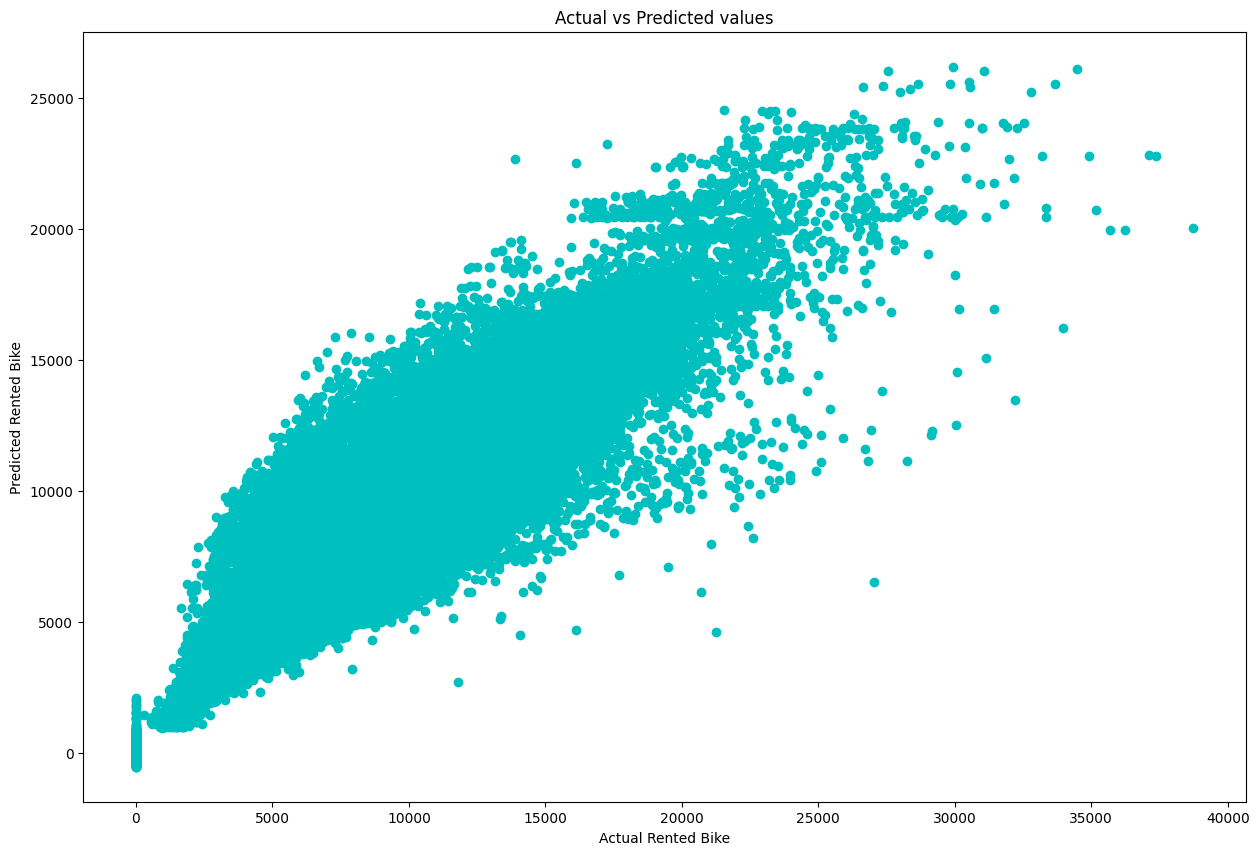

In [160]:
#Plotting the figure actual vs predicted
plt.figure(figsize=(15,10))
plt.scatter(x=y_test,y=y_pred_test_xgb,c='c')
plt.xlabel('Actual Rented Bike')
plt.ylabel('Predicted Rented Bike')
plt.title('Actual vs Predicted values')

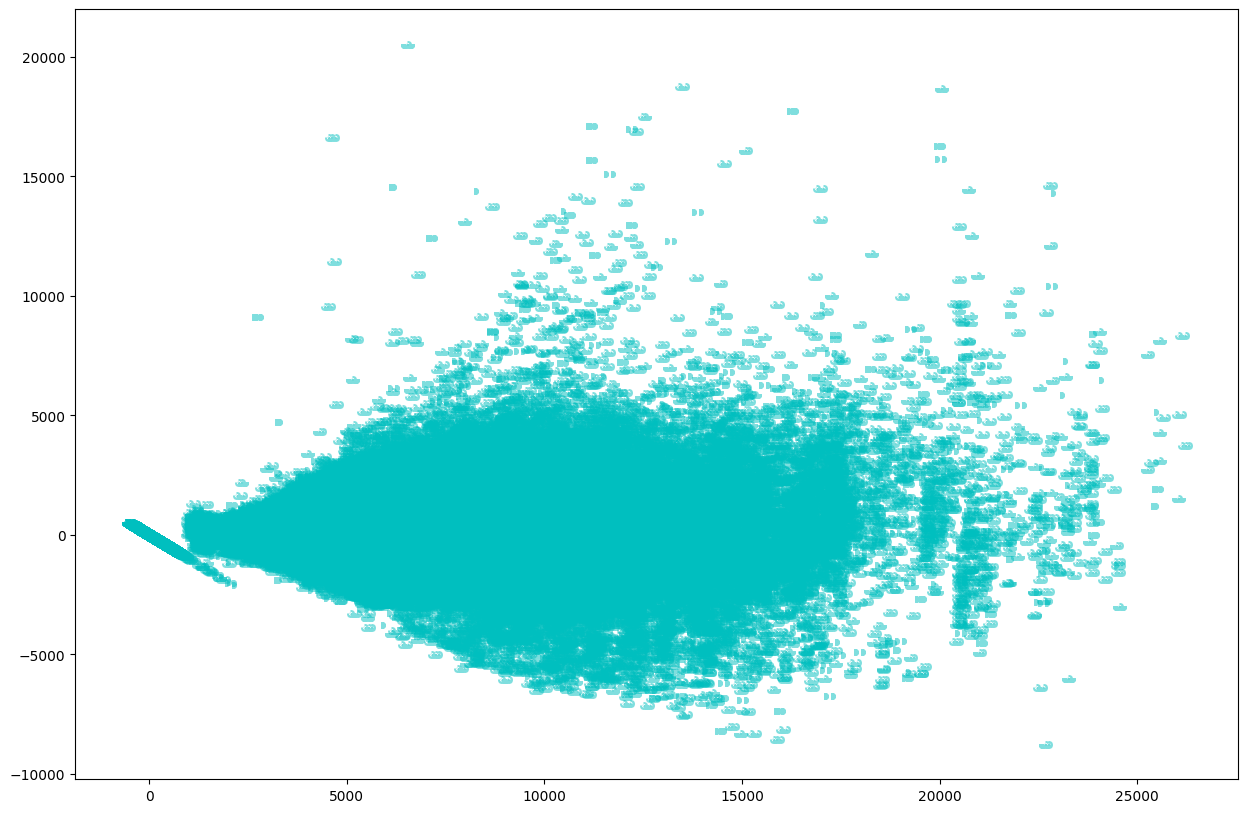

In [161]:
#Lets check for heteroscedasticity
plt.figure(figsize=(15,10))
plt.scatter(y_pred_test_xgb,y_test-y_pred_test_xgb,c='c',linewidth=5,linestyle='dashdot',marker='$...$',alpha=0.5)

#Linear Regression using cross validation

In [168]:
# Linear Regression
linear_model = LinearRegression()
linear_cv_scores = cross_val_score(linear_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
linear_rmse_cv = np.sqrt(-linear_cv_scores.mean())

In [169]:
# Fit the model to the training data
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [170]:
# Predict on the test set
y_pred_train_linear = linear_model.predict(X_train_scaled)

In [171]:
# Calculate metrics for the training set
MSE_linear_train = mean_squared_error(y_train, y_pred_train_linear)
RMSE_linear_train = np.sqrt(MSE_linear_train)
MAE_linear_train = mean_absolute_error(y_train, y_pred_train_linear)
R2_linear_train = r2_score(y_train, y_pred_train_linear)

In [172]:
# Print results for training set
print('Evaluation metrics for Linear Regression on the training set\n')
print(f'MSE: {MSE_linear_train}')
print(f'RMSE: {RMSE_linear_train}')
print(f'MAE: {MAE_linear_train}')
print(f'R2: {R2_linear_train}')

Evaluation metrics for Linear Regression on the training set

MSE: 2124052.9956568894
RMSE: 1457.4131177044103
MAE: 980.8528205104736
R2: 0.8569913462588951


In [173]:
# Predict on the test set
y_pred_test_linear = linear_model.predict(X_test_scaled)

In [174]:
# Calculate metrics for the test set
MSE_linear_test = mean_squared_error(y_test, y_pred_test_linear)
RMSE_linear_test = np.sqrt(MSE_linear_test)
MAE_linear_test = mean_absolute_error(y_test, y_pred_test_linear)
R2_linear_test = r2_score(y_test, y_pred_test_linear)

In [175]:
# Print results for test set
print('Evaluation metrics for Linear Regression on the test set\n')
print(f'MSE: {MSE_linear_test}')
print(f'RMSE: {RMSE_linear_test}')
print(f'MAE: {MAE_linear_test}')
print(f'R2: {R2_linear_test}')

Evaluation metrics for Linear Regression on the test set

MSE: 2110522.9097879366
RMSE: 1452.7638864550345
MAE: 977.7285192330378
R2: 0.8569163657862023


#Decision Tree using Cross validation

In [176]:
# Replace these placeholder values with your chosen hyperparameters
your_max_depth = 20
your_min_samples_split = 7
your_min_samples_leaf = 10

In [177]:
# Create the Decision Tree model with specified hyperparameters
dt_model = DecisionTreeRegressor(
    max_depth=your_max_depth,
    min_samples_split=your_min_samples_split,
    min_samples_leaf=your_min_samples_leaf
)

In [178]:
# Fit the model to the training data
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=10, min_samples_split=7)

In [179]:
# Predict on the training set
y_pred_train_dt = dt_model.predict(X_train_scaled)

In [180]:
# Calculate metrics for the training set
MSE_dec_train = mean_squared_error(y_train, y_pred_train_dt)
RMSE_dec_train = np.sqrt(MSE_dec_train)
MAE_dec_train = mean_absolute_error(y_train, y_pred_train_dt)
R2_dec_train = r2_score(y_train, y_pred_train_dt)

In [181]:
# Print results for training set
print('Evaluation metrics for Decision Tree on the training set\n')
print(f'MSE: {MSE_dec_train}')
print(f'RMSE: {RMSE_dec_train}')
print(f'MAE: {MAE_dec_train}')
print(f'R2: {R2_dec_train}')

Evaluation metrics for Decision Tree on the training set

MSE: 341530.5292631554
RMSE: 584.4061338343014
MAE: 340.68803832592283
R2: 0.9770053660142759


In [182]:
# Predict on the test set
y_pred_test_dt = dt_model.predict(X_test_scaled)

In [183]:
# Calculate metrics for the test set
MSE_dec_test = mean_squared_error(y_test, y_pred_test_dt)
RMSE_dec_test = np.sqrt(MSE_dec_test)
MAE_dec_test = mean_absolute_error(y_test, y_pred_test_dt)
R2_dec_test = r2_score(y_test, y_pred_test_dt)

In [184]:
# Print results for test set
print('Evaluation metrics for Decision Tree on the test set\n')
print(f'MSE: {MSE_dec_test}')
print(f'RMSE: {RMSE_dec_test}')
print(f'MAE: {MAE_dec_test}')
print(f'R2: {R2_dec_test}')

Evaluation metrics for Decision Tree on the test set

MSE: 472698.32666572096
RMSE: 687.5306005304208
MAE: 396.745905889205
R2: 0.9679532526501178


#Using Stocastic Gradient Descent

In [185]:
# Linear Regression with Gradient Descent
sgd_model = SGDRegressor()

In [186]:
# Cross-validation for RMSE on training data
sgd_cv_scores = cross_val_score(sgd_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
sgd_rmse_cv = np.sqrt(-sgd_cv_scores.mean())

In [187]:
# Fit the model to the training data
sgd_model.fit(X_train_scaled, y_train)

SGDRegressor()

In [188]:
# Predict on the training set
y_pred_train_sgd = sgd_model.predict(X_train_scaled)

In [189]:
# Calculate metrics for the training set
MSE_sgd_train = mean_squared_error(y_train, y_pred_train_sgd)
RMSE_sgd_train = np.sqrt(MSE_sgd_train)
MAE_sgd_train = mean_absolute_error(y_train, y_pred_train_sgd)
R2_sgd_train = r2_score(y_train, y_pred_train_sgd)

In [190]:
# Print results for training set
print('Evaluation metrics for Linear Regression with Gradient Descent on the training set\n')
print(f'MSE: {MSE_sgd_train}')
print(f'RMSE: {RMSE_sgd_train}')
print(f'MAE: {MAE_sgd_train}')
print(f'R2: {R2_sgd_train}')

Evaluation metrics for Linear Regression with Gradient Descent on the training set

MSE: 2133757.456833932
RMSE: 1460.7386682202714
MAE: 992.0044164619758
R2: 0.8563379624068681


In [191]:
# Predict on the test set
y_pred_test_sgd = sgd_model.predict(X_test_scaled)

In [192]:
# Calculate metrics for the test set
MSE_sgd_test = mean_squared_error(y_test, y_pred_test_sgd)
RMSE_sgd_test = np.sqrt(MSE_sgd_test)
MAE_sgd_test = mean_absolute_error(y_test, y_pred_test_sgd)
R2_sgd_test = r2_score(y_test, y_pred_test_sgd)

In [193]:
# Print results for test set
print('Evaluation metrics for Linear Regression with Gradient Descent on the test set\n')
print(f'MSE: {MSE_sgd_test}')
print(f'RMSE: {RMSE_sgd_test}')
print(f'MAE: {MAE_sgd_test}')
print(f'R2: {R2_sgd_test}')

Evaluation metrics for Linear Regression with Gradient Descent on the test set

MSE: 2119974.7545261746
RMSE: 1456.0133084989898
MAE: 988.733111365024
R2: 0.8562755746870394


Based on the evaluation metrics on the test set, the Random Forest Regression algorithm performs the best with the lowest MSE, RMSE, and MAE values, and the highest R2 score. Therefore, the Random Forest Regression model is the preferred choice among the listed algorithms for this particular problem.

**Summary:**

The project involves predicting the daily sales of over 3,000 Rossmann drug stores across 7 European countries. With historical sales data provided, the goal is to forecast sales for up to six weeks in advance. Various factors such as promotions, competition, school and state holidays, seasonality, and locality influence store sales.

Exploratory Data Analysis (EDA) revealed several insights:
- The sales distribution is positively skewed, with the maximum sales being 41551 and the minimum being 0.
- First-day sales tend to be higher compared to other days.
- Promotions have a significant positive effect on sales, with average sales around 4500 without promotions and around 8000 with promotions.
- State holidays coded as '0' have the highest average sales compared to other categories, suggesting differences in consumer behavior during regular days versus state holidays.
- Sales are higher during school holidays compared to regular days, indicating potential differences in consumer behavior during school breaks.
- Certain months, weeks, and days exhibit higher sales, suggesting seasonality and temporal patterns in sales data.
- The Random Forest Regression algorithm outperforms other algorithms based on evaluation metrics on the test set.

**Conclusion:**

The project provides valuable insights into factors influencing retail sales and demonstrates the effectiveness of machine learning algorithms in predicting sales. By leveraging historical sales data and machine learning models, Rossmann can make more accurate sales forecasts, optimize inventory management, and improve decision-making processes. Additionally, the findings can help Rossmann tailor marketing strategies, promotions, and operational plans to maximize sales and enhance overall business performance.